## **Credit Card Customer Segmentation**

### **A. Introduction**

- **Name**  : Livia Amanda Annafiah
- **Dataset** : Credit Card Information

---------------------

**Problem Statement**

A bank company struggles to effectively target and understand its diverse customer base due to a lack of insights into their specific needs and preferences. Therefore, they wanted to do Customer Segmentation from a data credit information. This data contains information about the credit card user from the last 6 months, including balance, spending patterns, credit limits, payment behavior, and other details.

 To overcome this challenge, the company requires a model capable of clustering customers based on their credit-related activities and characteristics.

**Objective**

This project aims to develop a clustering model using `K-Means` and `K-Prototypes` algorithms to segment customers based on their credit-related activities and characteristics. The goal is to identify distinct customer groups with similar behaviors and preferences, enabling the bank company to provide their services and marketing strategies more effectively.

### **B. Query SQL**

These are the query used to load the dataset from FTDS Hacktiv8 Project and is converted to .csv to create the model in Visual Studio Code.

```sql
from google.colab import auth
from google.cloud import bigquery
import pandas as pd

auth.authenticate_user()
print('Authenticated')

client = bigquery.Client(project="hacktiv8-sql-417802")

df = client.query('''
SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_005_bsd.credit-card-information`
WHERE MOD(CUST_ID, 2) != 0
''').to_dataframe()

df.to_csv('P1G6_Set_2_livia_amanda.csv', index=False)

### **C. Libraries**

The libraries used to develop the model are as follows:

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pickle
import json

# Import libraries for data preprocessing
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Import libraries for model development and visualization
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score, silhouette_samples

# Import libraries to hide warnings
import warnings
warnings.filterwarnings('ignore')

**Libraries Function**
- pandas: data manipulation and analysis
- numpy: numerical computations and operations on arrays
- matplotlib : data visualization and statistical plotting
- seaborn: data visualization and statistical plotting
- pickle: saving model
- json: handling JSON data format for data interchange and storage
- feature engine: handling outliers
- sklearn: machine learning algorithms, model creation, feature engineering, and evaluation
- kmodes: machine learning algorithms, model creation, feature engineering, and evaluation
- warnings: remove warning messages

### **D. Data Loading & Cleaning**

In this section, the data is loaded and cleaned to ensure accurate and reliable analysis.

#### **i. Data Loading**

The data is first loaded from a CSV file that was previously saved in Google Colab.

In [2]:
# Load dataset
df_ori = pd.read_csv('P1G6_Set_1_livia_amanda.csv')

# Duplicate dataset
df = df_ori.copy()

# Show the first 10 data
df.head(10)

CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     3091    3.833185           0.125000      45.00             45.00   
1     5069    0.000000           0.000000     176.03            176.03   
2     6075  757.964752           0.875000     157.40            157.40   
3     6291  264.566591           0.375000    1150.00           1150.00   
4     7755  440.613643           1.000000     600.00            600.00   
5     8299  611.561026           1.000000     765.00            765.00   
6     8629    0.228572           0.125000      60.00             60.00   
7     8805  105.333584           0.375000     306.00            306.00   
8        7   16.379412           0.454545     178.15              0.00   
9       91  559.151424           1.000000      94.00             94.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    0.00           0.0                0.125   
1                    0.00           0.0                0.125   
2                    0.00           0.0                0.125   
3                    0.00           0.0                0.125   
4                    0.00           0.0                0.125   
5                    0.00           0.0                0.125   
6                    0.00           0.0                0.125   
7                    0.00           0.0                0.125   
8                  178.15           0.0                0.250   
9                    0.00           0.0                0.250   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125                              0.00   
1                       0.125                              0.00   
2                       0.125                              0.00   
3                       0.125                              0.00   
4                       0.125                              0.00   
5                       0.125                              0.00   
6                       0.125                              0.00   
7                       0.125                              0.00   
8                       0.000                              0.25   
9                       0.250                              0.00   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              1         500.0   
1                     0.0                 0              1        7000.0   
2                     0.0                 0              6        1200.0   
3                     0.0                 0              1        1200.0   
4                     0.0                 0              1        1000.0   
5                     0.0                 0              1        2000.0   
6                     0.0                 0              1        1500.0   
7                     0.0                 0              2        6000.0   
8                     0.0                 0              3        5000.0   
9                     0.0                 0              3        5500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     0.000000               NaN          0.000000       8  
1     0.000000               NaN          0.000000       8  
2  1494.480376       2638.598410          0.000000       8  
3  3029.380326         85.428885          0.000000       8  
4   215.316424        137.846006          0.000000       8  
5   204.464151        146.352314          0.000000       8  
6   438.738982               NaN          0.000000       8  
7   101.986927        118.324082          0.000000       8  
8   229.376368         89.613822          0.181818      12  
9   254.733329        218.279194          0.000000      12

The output displays the first 10 entries from the dataset, which provide details into the customer's credit card information. This includes their balance, purchases, payment, credit limits, and tenure with the bank, among other relevant factors. Analyzing this data provides insights into customer behavior and financial patterns, which can be used for customer segmentation.

Further insights can be obtained by exploring the last 10 entries of the dataset.

In [3]:
# Show the last 10 data
df.tail(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
4465     6809  4438.521324           1.000000     591.84            109.16   
4466     7211  1135.703750           1.000000      92.07              0.00   
4467     8295   185.984965           0.454545     482.24            392.24   
4468     8855  3531.167073           0.900000     797.50            577.83   
4469     2389  1917.895730           1.000000     285.07            285.07   
4470     2345  9629.808851           1.000000       0.00              0.00   
4471     6785  1040.030221           1.000000       0.00              0.00   
4472     7347  1322.818587           1.000000       0.00              0.00   
4473     8447  1060.391273           1.000000       0.00              0.00   
4474     1995  3447.674222           1.000000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
4465                  482.68    564.365429             0.636364   
4466                   92.07     81.509491             0.272727   
4467                   90.00    903.843591             0.272727   
4468                  219.67   5273.226918             0.700000   
4469                    0.00   6084.858872             0.363636   
4470                    0.00   4372.393835             0.000000   
4471                    0.00   1390.648290             0.000000   
4472                    0.00    762.301096             0.000000   
4473                    0.00   1475.858013             0.000000   
4474                    0.00   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
4465                    0.181818                          0.454545   
4466                    0.000000                          0.181818   
4467                    0.181818                          0.090909   
4468                    0.400000                          0.500000   
4469                    0.363636                          0.000000   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.000000                          0.000000   
4473                    0.000000                          0.000000   
4474                    0.090909                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
4465                0.272727                 3             11       17000.0   
4466                0.272727                 3              3        1200.0   
4467                0.272727                 8              8        1200.0   
4468                0.900000                33             21        4000.0   
4469                1.090909                28              6        3000.0   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
4465  5552.601399       1094.486286              0.00      11  
4466   355.798199        434.689529              0.00      11  
4467  2333.997439        160.900585              0.25      11  
4468  2979.546700       3052.080103              0.00      10  
4469  5692.682993        556.449635              0.00      11  
4470  2468.988022       2134.295731              0.00      11  
4471   290.129620        287.994171              0.00      11  
4472  1035.627320        312.835530              0.00      11  
4473   407.360560        277.084736              0.00      11  
4474   665.239171        817.844662              0.00      11

Similarly, the dataset includes details about credit card information, with some columns are encoded from categorical variables. Below is a table summarizing each column's description for better understanding.

<center>

| **Column Name**                    | **Data Type**                 | **Description**                                             |
|------------------------------------|-------------------------------|-------------------------------------------------------------|
| `CUST_ID`                            | Numerical                     | Identification of Credit Card holder                        |
| `BALANCE`                            | Numerical                     | Balance amount left in their account to make purchases      |
| `BALANCE_FREQUENCY`                  | Categorical Encoded           | How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)|
| `PURCHASES`                          | Numerical                     | Amount of purchases made from account                       |
| `ONEOFF_PURCHASES`                   | Numerical                     | Maximum purchase amount done in one-go                      |
| `INSTALLMENTS_PURCHASES`             | Numerical                     | Amount of purchase done in installment                      |
| `CASH_ADVANCE`                       | Numerical                     | Cash in advance given by the user                           |
| `PURCHASES_FREQUENCY`                | Categorical Encoded           | How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)|
| `ONEOFF_PURCHASES_FREQUENCY`         | Categorical Encoded           | How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)|
| `PURCHASES_INSTALLMENTS_FREQUENCY`   | Categorical Encoded           | How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)|
| `CASH_ADVANCE_FREQUENCY`             | Categorical Encoded           | How frequently the cash in advance being paid (1 = frequently done, 0 = not frequently done)|
| `CASH_ADVANCE_TRX`                   | Numerical                     | Number of Transactions made with 'Cash in Advanced'         |
| `PURCHASES_TRX`                      | Numerical                     | Number of purchase transactions made                        |
| `CREDIT_LIMIT`                       | Numerical                     | Limit of Credit Card for user                               |
| `PAYMENTS`                           | Numerical                     | Amount of Payment done by user                              |
| `MINIMUM_PAYMENTS`                   | Numerical                     | Minimum amount of payments made by user                     |
| `PRC_FULL_PAYMENT`                   | Numerical                     | Percent of full payment paid by user                        |
| `TENURE`                             | Numerical                     | Tenure of credit card service for user                      |

</center>

The `info` method is used to check the summary information of the dataset.

In [4]:
# Check data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

The dataset contains **4475** rows and **18** columns. Most columns have complete data, except for `MINIMUM_PAYMENTS`, which has some missing values. This indicates that handling missing values will be necessary in the further process. Meanwhile, the data types in the dataset are appropriately assigned to their columns, ensuring that each variable is represented in the correct format for analysis and processing.

The next step is to explore the distribution of the dataset using `describe` method.

In [5]:
# Check descriptive statistictis
df.describe()

CUST_ID       BALANCE  BALANCE_FREQUENCY     PURCHASES  \
count  4475.000000   4475.000000        4475.000000   4475.000000   
mean   4475.000000   1563.205717           0.876933   1003.251343   
std    2583.931114   2072.045789           0.238222   2060.034730   
min       1.000000      0.000000           0.000000      0.000000   
25%    2238.000000    124.432849           0.888889     39.560000   
50%    4475.000000    871.355430           1.000000    360.000000   
75%    6712.000000   2047.570799           1.000000   1102.420000   
max    8949.000000  18495.558550           1.000000  41050.400000   

       ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
count       4475.000000             4475.000000   4475.000000   
mean         596.369893              407.110215    984.288554   
std         1653.425984              880.799744   2060.448056   
min            0.000000                0.000000      0.000000   
25%            0.000000                0.000000      0.000000   
50%           45.650000               88.620000      0.000000   
75%          575.220000              455.885000   1138.887754   
max        40624.060000            14686.100000  47137.211760   

       PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
count          4475.000000                 4475.000000   
mean              0.490579                    0.202301   
std               0.402907                    0.298203   
min               0.000000                    0.000000   
25%               0.083333                    0.000000   
50%               0.500000                    0.083333   
75%               0.916667                    0.250000   
max               1.000000                    1.000000   

       PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
count                       4475.000000             4475.000000   
mean                           0.363886                0.136132   
std                            0.397603                0.201036   
min                            0.000000                0.000000   
25%                            0.000000                0.000000   
50%                            0.166667                0.000000   
75%                            0.750000                0.250000   
max                            1.000000                1.500000   

       CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT      PAYMENTS  \
count       4475.000000    4475.000000   4475.000000   4475.000000   
mean           3.301229      14.929162   4494.878630   1740.075430   
std            7.134727      25.540814   3609.267706   2827.633858   
min            0.000000       0.000000     50.000000      0.000000   
25%            0.000000       1.000000   1600.000000    376.913051   
50%            0.000000       7.000000   3000.000000    877.494612   
75%            4.000000      17.000000   6500.000000   1911.596530   
max          123.000000     347.000000  30000.000000  50721.483360   

       MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count       4320.000000       4475.000000  4475.000000  
mean         873.976757          0.150224    11.518212  
std         2436.877272          0.289081     1.328925  
min            0.019163          0.000000     6.000000  
25%          168.590144          0.000000    12.000000  
50%          313.980229          0.000000    12.000000  
75%          819.371080          0.125000    12.000000  
max        76406.207520          1.000000    12.000000

Here are the main takeaways from the summary statistics:

- On average, customers maintain a balance of about 1563, but this varies widely as shown by the standard deviation of 2072, indicating diverse account balances.
- The average purchase amount is around 1003, but again, there's a significant range in spending patterns as seen from the standard deviation of 2060.
- Credit limits vary widely, ranging from 50 to 30000, with an average limit of 4494, reflecting differing credit capacities among customers.
- The difference between the mean and median suggests a skewed distribution in columns like `BALANCE`, where a few customers with high balances influence the mean, causing it to be higher than the median. This indicates the data isn't evenly spread and may need handling in analysis.

Overall, the data shows a diverse range of customer behaviors and financial activities, indicating the need for further exploration and analysis.

The next step involves checking for any duplicated rows in the data using the `duplicated` method.

In [6]:
# Check total of duplicated rows
df.duplicated().sum()

0

The dataset doesn't have any duplicated rows, indicating that handling duplicates isn't necessary.

After that, the total number of missing values in the dataset is checked using the `isnull` method.

In [7]:
# Check missing values
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

It indicates that there's a missing value in the `MINIMUM_PAYMENTS` column, as previously mentioned. Specifically, there are 155 missing values out of 2074 rows. This issue will be addressed in further steps.

#### **ii. Data Cleaning**

Following an exploration of the dataset, the next task involves data cleaning to simplify future processes. Since the majority of the data appears to be accurate, the remaining steps for cleaning is the removal of the identifier column, namely `CUST ID`.

In [8]:
# Remove columns for identifier
df = df.drop('CUST_ID', axis=1)

#### **iii. Data Checking**

To confirm whether the column has been dropped and the cleaning process is complete, it can be verify by examining the summary of the data using the `info` method once again.

In [9]:
# Last check data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           4475 non-null   float64
 1   BALANCE_FREQUENCY                 4475 non-null   float64
 2   PURCHASES                         4475 non-null   float64
 3   ONEOFF_PURCHASES                  4475 non-null   float64
 4   INSTALLMENTS_PURCHASES            4475 non-null   float64
 5   CASH_ADVANCE                      4475 non-null   float64
 6   PURCHASES_FREQUENCY               4475 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 10  CASH_ADVANCE_TRX                  4475 non-null   int64  
 11  PURCHASES_TRX                     4475 non-null   int64  
 12  CREDIT

The dataset now contains **17** columns, and the absence of `CUST ID` confirms that the cleaning process has been successfully completed.

### **E. Exploratory Data Analysis (EDA)**

This section aims to gain insights into the data distribution through visualizations such as bar charts, histograms, etc., in order to enhance understanding of the dataset.

##### **i. Correlation Analysis**

The initial step is to check potential correlations among variables using a heatmap.

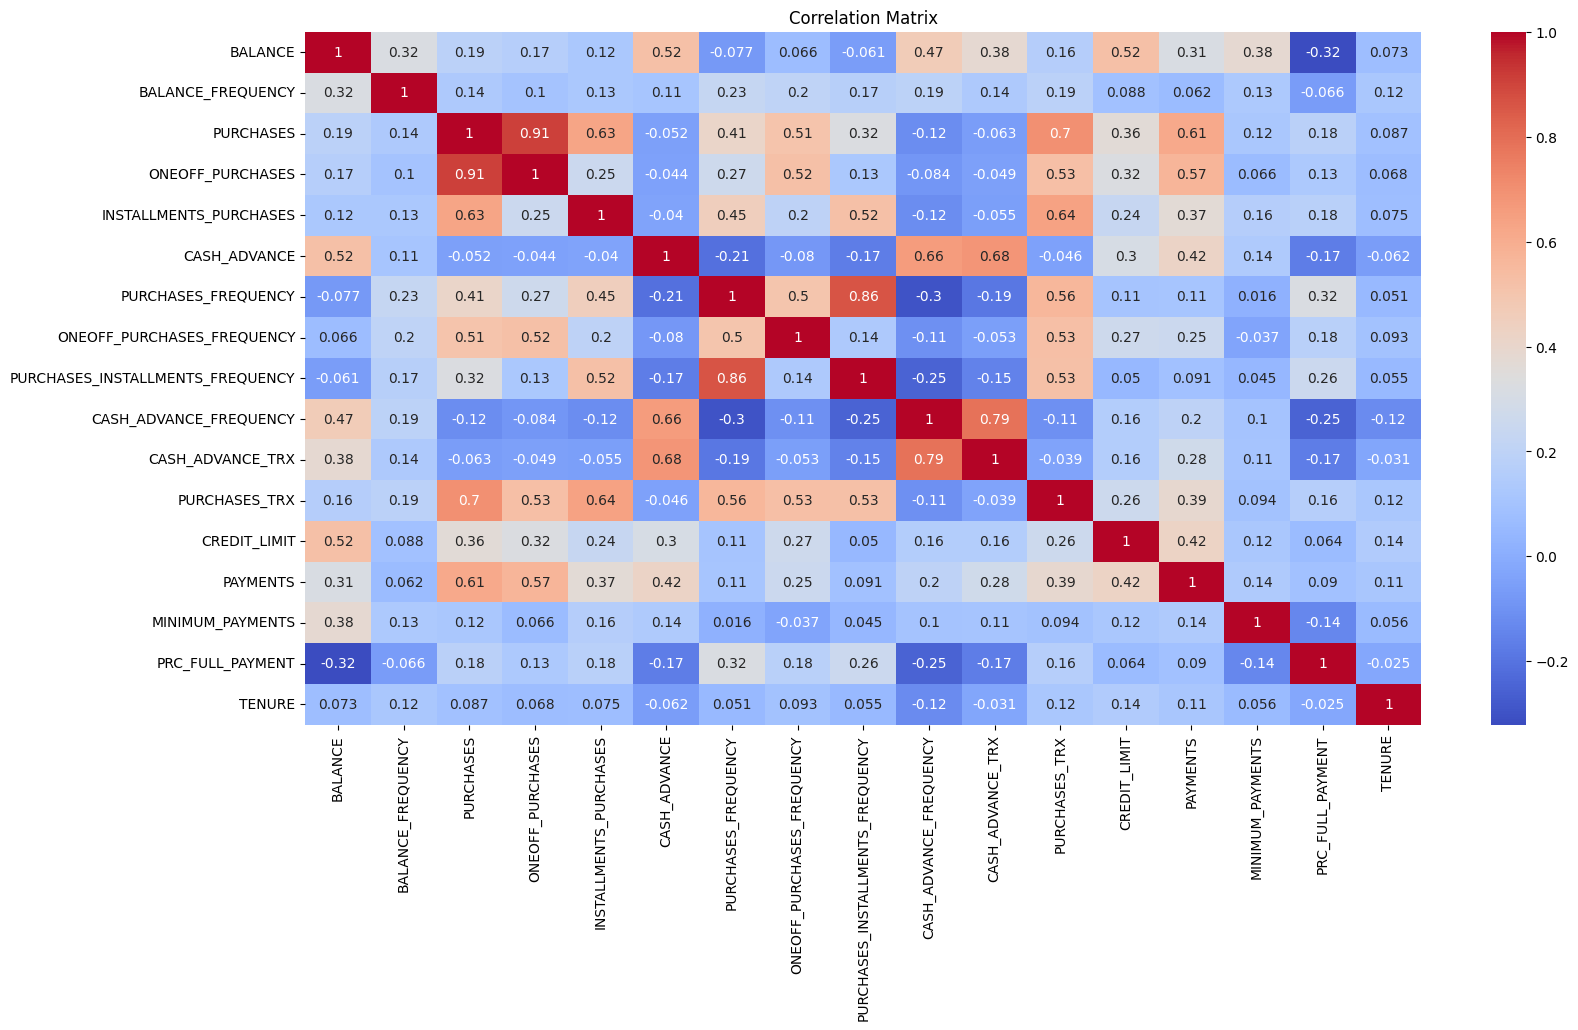

In [10]:
# Create plot for correlation matrix
plt.figure(figsize=(18,9))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

# Show result
plt.show()

The correlation matrix presented here indicates a variety of relationships between different credit card usage parameters. The blue color indicates a weak or negative correlation between variables, while the red color indicates a strong positive correlation.

- **Purchases vs One-Off Purchases**: The matrix shows a **strong** correlation between overall purchases and one-off purchases (coefficient near 0.91), indicating that cardholders who make one-off purchases tend to contribute substantially to their total purchase volume.

- **Cash Advances vs Cash Advance Transactions**: There is a **high** correlation (coefficient around 0.68) between the cash advance amount and the number of cash advance transactions, which could imply that customers who take cash advances do so with multiple transactions over the period analyzed.

- **Purchases Frequency vs Installment Purchases**: The data exhibits a **strong** correlation (coefficient approximately 0.86) between the frequency of purchases and the frequency of installment purchases, suggesting that those who purchase frequently are likely to do so in installments rather than as one-offs.

- **Purchase vs Balance**: The result shows a very **weak** correlation between purchase and balance, which indicates that higher balances does not leads to higher purchases.

##### **ii. Distribution Analysis**

The next exploration involves exploring the distribution of specific variables which are `BALANCE`, `PURCHASES`, `CREDIT LIMIT`, and `PAYMENTS`.

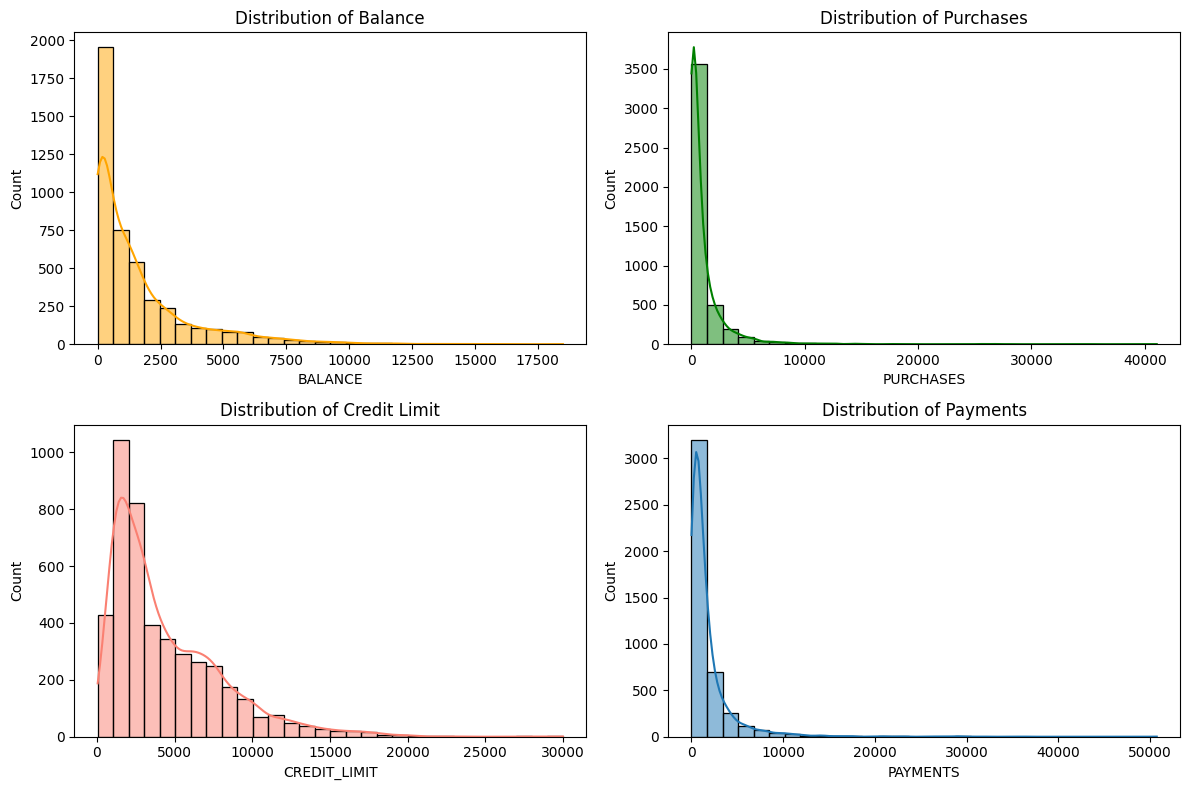

In [11]:
# Create a figure and 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plotting histograms for each variable
sns.histplot(df['BALANCE'], bins=30, kde=True, color='orange', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Balance')

sns.histplot(df['PURCHASES'], bins=30, kde=True, color='green', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Purchases')

sns.histplot(df['CREDIT_LIMIT'], bins=30, kde=True, color='salmon', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Credit Limit')

sns.histplot(df['PAYMENTS'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Payments')

# Show result
plt.tight_layout()
plt.show()

The histograms shows key insights into the distribution of financial variables:

- **Balance**: Most cardholders maintain low balances, with a sharp decrease in frequency as balance increases, indicating that high balances are less common.

- **Credit Limit**: The distribution of credit limits is skewed to the right but less steeply than balances, showing a concentration of lower credit limits with fewer individuals having very high limits.

- **Purchases**: Similar to balance, the majority of users make low-value purchases, with the number of users making higher-value purchases decreasing sharply.

- **Payments**: Payments show a heavy concentration at lower amounts, suggesting that most cardholders pay small amounts, likely either minimum payments or moderately above them, with very few making large payments.

These distributions suggest cautious financial behavior with most users maintaining low balances and limits, and making lower purchases and payments, possibly indicating a trend towards conservative credit card usage or managing expenses within a manageable range.

##### **iii. Frequency Analysis**

The next step is the exploring of the frequency of the categorical encoded columns, where 1 indicates frequent occurrences and 0 indicates infrequent occurrences.

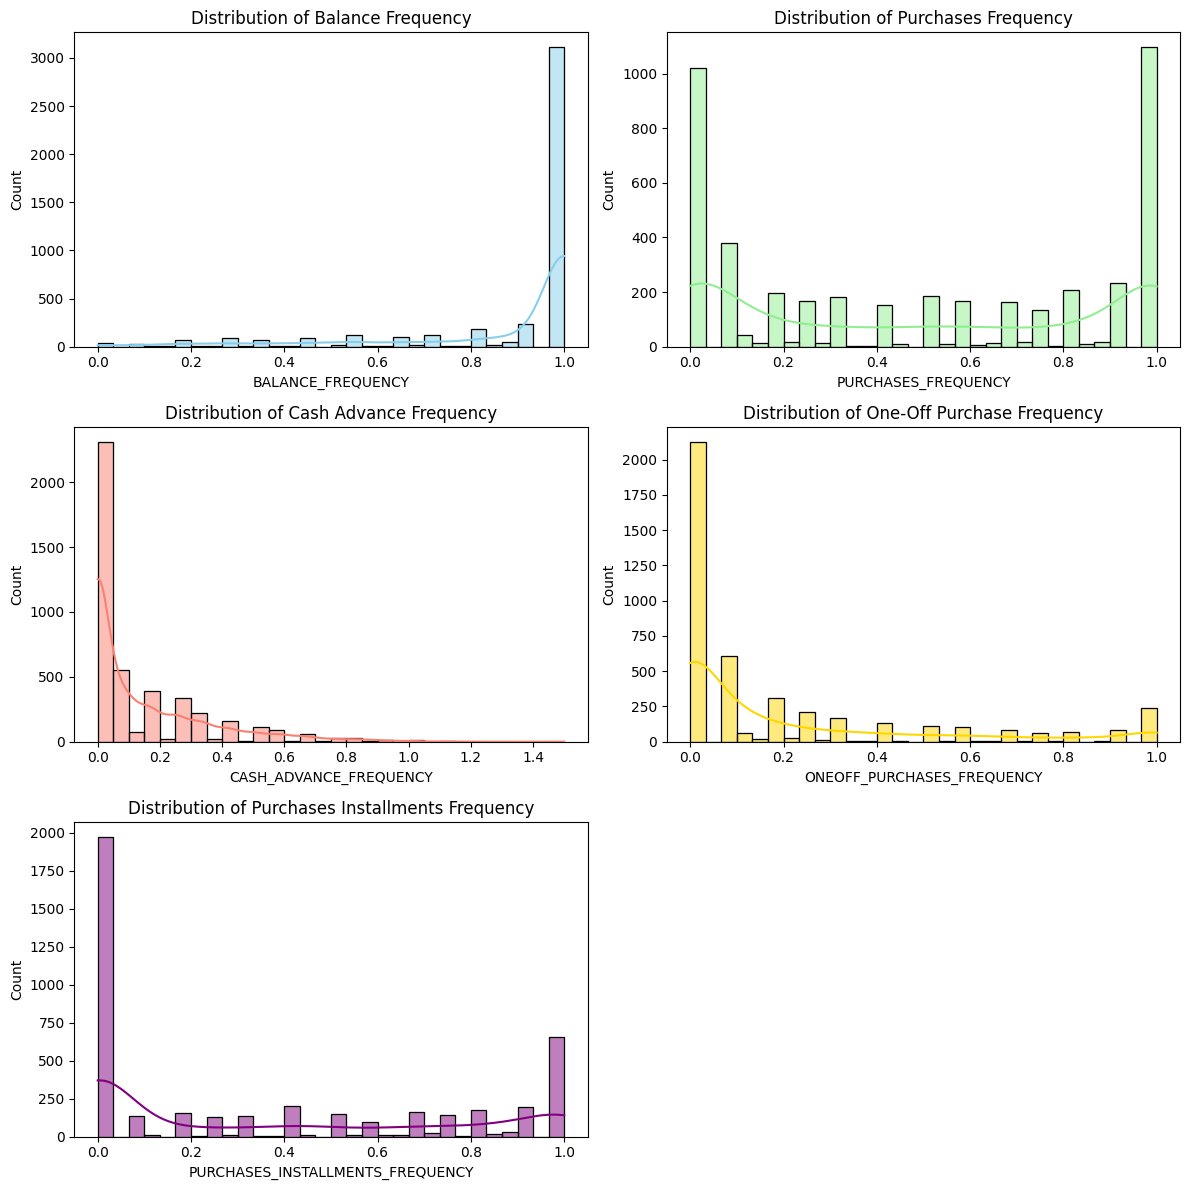

In [12]:
# Create a figure and subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

# Plotting histograms for each variable
sns.histplot(df['BALANCE_FREQUENCY'], bins=30, kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Balance Frequency')

sns.histplot(df['PURCHASES_FREQUENCY'], bins=30, kde=True, color='lightgreen', ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Purchases Frequency')

sns.histplot(df['CASH_ADVANCE_FREQUENCY'], bins=30, kde=True, color='salmon', ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Cash Advance Frequency')

sns.histplot(df['ONEOFF_PURCHASES_FREQUENCY'], bins=30, kde=True, color='gold', ax=axes[1, 1])
axes[1, 1].set_title('Distribution of One-Off Purchase Frequency')

sns.histplot(df['PURCHASES_INSTALLMENTS_FREQUENCY'], bins=30, kde=True, color='purple', ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Purchases Installments Frequency')

# Remove the empty subplot
fig.delaxes(axes[2, 1])

# Show result
plt.tight_layout()
plt.show()

The histograms provide insights into how different credit card features are used by cardholders:

- **Balance Frequency**: There's a prominent peak at the highest frequency, showing that many users consistently update their balances, which implies regular card usage.

- **Purchases Frequency**: The distribution has two distinct peaks, indicating that some cardholders frequently make purchases, while others rarely use their card for buying items.

- **Cash Advance Frequency**: The graph predominantly leans towards lower frequencies, demonstrating that cash advances are rarely utilized by most cardholders, with only a small fraction using this feature more frequently.

- **One-Off Purchase Frequency**: Most cardholders rarely make one-off purchases, as evidenced by the spike near zero frequency. A smaller group does use their card for occasional large purchases.

- **Purchases Installments Frequency**: A significant number of users either frequently make installment purchases or do not use this option at all, resulting in a high count at both extremes of the scale.

These patterns highlight the different ways cardholders engage with their credit cards, from regular usage to more specific uses, reflecting diverse financial behaviors and preferences.

##### **iv. Spending Patterns**

Finally, the spending patterns of customers are explored to identify preferences between one-off purchases and installment purchases.

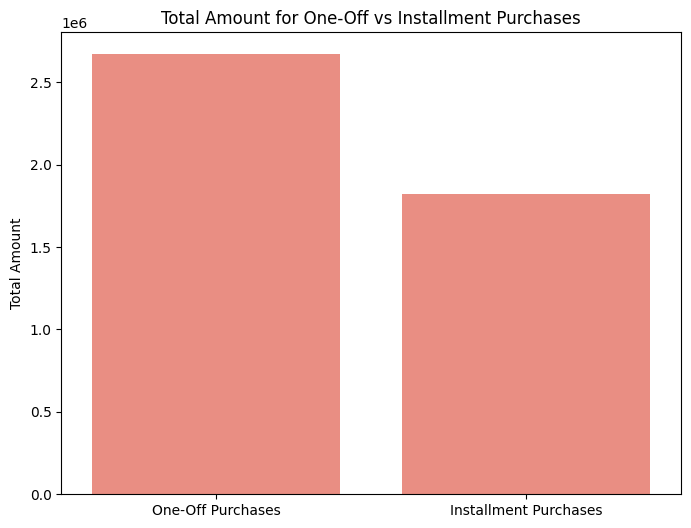

In [13]:
# Total amounts for ONEOFF_PURCHASES vs INSTALLMENTS_PURCHASES
total_oneoff_purchases = df['ONEOFF_PURCHASES'].sum()
total_installment_purchases = df['INSTALLMENTS_PURCHASES'].sum()

# Plot the total amounts
plt.figure(figsize=(8, 6))
sns.barplot(x=['One-Off Purchases', 'Installment Purchases'], y=[total_oneoff_purchases, total_installment_purchases], color='salmon')
plt.title('Total Amount for One-Off vs Installment Purchases')
plt.ylabel('Total Amount')

# Show result
plt.show()

The bar chart illustrates that the total amount spent on one-off purchases exceeds the total amount spent on installment purchases. This suggests that while fewer transactions may be made in the one-off purchase category, the individual transaction amounts are likely higher, leading to a greater total expenditure in this category than in installment purchases. This could indicate a preference among cardholders to make larger, less frequent purchases outright, rather than spreading out payments over time.

### **F. Feature Engineering**

Before proceeding with model development, it is essential to choose the features carefully to include only correlated ones while excluding irrelevant or redundant ones. Moreover, these selected features should be preprocessed to improve the overall analysis.

#### **i. Missing Value Handling**

As previously mentioned, the dataset includes missing values in the `MINIMUM_PAYMENTS` column, accounting for 3.46% of the data. This missing data is considered **MAR (Missing at Random)**, suggesting that it's not uniformly missing across all observations but rather within specific sub-samples. The assumption is that customers with different financial behaviors may show distinct patterns of missing information.

It's reasonable to assume that customers who frequently use their credit cards or have higher credit limits might have more consistent records of minimum payments, unlike those who use their cards less often or have lower credit limits.

However, considering that the missing values represent 3.46% of the dataset, removing them would lead to the loss of valuable insights needed for customer segmentation. Therefore, the chosen method to handle missing values would be using **Imputation**. Imputation means filling the missing values with mean, median, or mode.

[Reference 1](https://ngugijoan.medium.com/handling-missing-values-data-science-7b8e302264ee)  
[Reference 2](https://www.mastersindatascience.org/learning/how-to-deal-with-missing-data/)

Before imputing the missing values, it's essential to examine the distribution of the column to determine the appropriate method for handling the missing data.

In [14]:
# Check skewness
df['MINIMUM_PAYMENTS'].skew()

14.669771084332645

There are several methods for imputing data:
- Mean => for normally distributed numerical columns
- Median => for skewed numerical distributed columns
- Mode => for categorical columns

The column `MINIMUM_PAYMENTS` has a skewness of 14.67, indicating an **extremely skewed distribution**. As a result, it will be imputed using the **median** value of the column.

In [15]:
# Define imputer
imputer = SimpleImputer(strategy='median')

# Apply to the column
df['MINIMUM_PAYMENTS'] = imputer.fit_transform(df)

The code uses **SimpleImputer** to automatically fill in missing values with the median. This transformation has been applied to the `MINIMUM_PAYMENTS` column.

To ensure that the missing values have been successfully imputed, the `isnull` method is applied again to verify their absence.

In [16]:
# Check the missing values
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

The absence of missing values in the `MINIMUM_PAYMENTS` column indicates that the imputation process was successful.

#### **ii. Outlier Handling**

Since outliers were found in the earlier exploration, they need to be handled to ensure the accuracy of the analysis.

In [17]:
# Check total unique values
df.nunique()

BALANCE                             4433
BALANCE_FREQUENCY                     43
PURCHASES                           3203
ONEOFF_PURCHASES                    2093
INSTALLMENTS_PURCHASES              2292
CASH_ADVANCE                        2169
PURCHASES_FREQUENCY                   46
ONEOFF_PURCHASES_FREQUENCY            45
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                51
CASH_ADVANCE_TRX                      52
PURCHASES_TRX                        150
CREDIT_LIMIT                         158
PAYMENTS                            4362
MINIMUM_PAYMENTS                    4433
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In outlier handling, only **numerical** columns will be handled. Also, numerical columns with a **limited** number of unique values (<10) will not be included in this process. The excluded columns are:

- `BALANCE_FREQUENCY`
- `PURCHASES_FREQUENCY`
- `ONEOFF_PURCHASES_FREQUENCY`
- `PURCHASES_INSTALLMENTS_FREQUENCY`
- `CASH_ADVANCE_FREQUENCY`
- `TENURE`

To identify outliers, it's important to understand the distribution of the data first, which helps determine the appropriate method for outlier detection and handling. This can be performed by using `skew` method.

In [18]:
# Create function to check skewness
def check_skewness(df, *column_names):
    return {col: df[col].skew() for col in column_names if col in df.columns}

# Calculate skewness of all numeric columns
skewness_results = check_skewness(df, 'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX',
                                  'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT')

# Print skewness
for col, skewness in skewness_results.items():
    print(f"{col}: {skewness}")

BALANCE: 2.3290088807150915
PURCHASES: 7.071705718331177
ONEOFF_PURCHASES: 9.951056583113456
INSTALLMENTS_PURCHASES: 6.330629906494809
CASH_ADVANCE: 5.638109294257693
CASH_ADVANCE_TRX: 6.420103784668197
PURCHASES_TRX: 4.747507133980154
CREDIT_LIMIT: 1.498947716941148
PAYMENTS: 5.747503259811283
MINIMUM_PAYMENTS: 2.3290088807150915
PRC_FULL_PAYMENT: 1.9752382754788178


After calculating the skewness of each numerical column, the data will be categorized into three groups based on their skewness levels: normal columns, skewed columns, and extremely skewed columns.

In [19]:
# Initialize empty lists for each skewness category
normal_columns = []
skewed_columns = []
extreme_skewed_columns = []

# Loop through the skewness values and categorize the columns
for col, skewness in skewness_results.items():
    if skewness < -1.0 or skewness > 1.0:
        extreme_skewed_columns.append(col)
    elif abs(skewness) <= 0.5:
        normal_columns.append(col)
    else:
        skewed_columns.append(col)

# Print the columns in each category
print(f"Normal: {normal_columns}\nSkewed: {skewed_columns}\nExtreme Skewed: {extreme_skewed_columns}")

Normal: []
Skewed: []
Extreme Skewed: ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']


It can be concluded that all columns are **extreme skewed**.

##### **i. Before Handling**

The first step involves calculating the percentage of outliers in the data and visualizing this information using a box plot.

In [20]:
# Create function to calculate outlier percentages
def calculate_outlier_percentages(df, columns, method='normal', distance=1.5):
    for variable in columns:
        if method == 'normal':
            std_dev = df[variable].std()
            mean_val = df[variable].mean()
            lower_boundary = mean_val - (3 * std_dev)
            upper_boundary = mean_val + (3 * std_dev)
        elif method == 'skew':
            IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
            lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
            upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

        outliers = df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)]
        outlier_percentage = len(outliers) / len(df) * 100
        
        print('Percentage of outliers in {}: {:.2f}%'.format(variable, outlier_percentage))

# For extreme skewed columns
calculate_outlier_percentages(df, extreme_skewed_columns, method='skew', distance=3)

Percentage of outliers in BALANCE: 2.08%
Percentage of outliers in PURCHASES: 4.65%
Percentage of outliers in ONEOFF_PURCHASES: 6.41%
Percentage of outliers in INSTALLMENTS_PURCHASES: 4.83%
Percentage of outliers in CASH_ADVANCE: 5.36%
Percentage of outliers in CASH_ADVANCE_TRX: 4.22%
Percentage of outliers in PURCHASES_TRX: 4.22%
Percentage of outliers in CREDIT_LIMIT: 0.09%
Percentage of outliers in PAYMENTS: 4.65%
Percentage of outliers in MINIMUM_PAYMENTS: 2.08%
Percentage of outliers in PRC_FULL_PAYMENT: 12.13%


Outliers are still present in every column, with percentages ranging from 0.09% to 12.14%. Addressing these outliers is necessary.

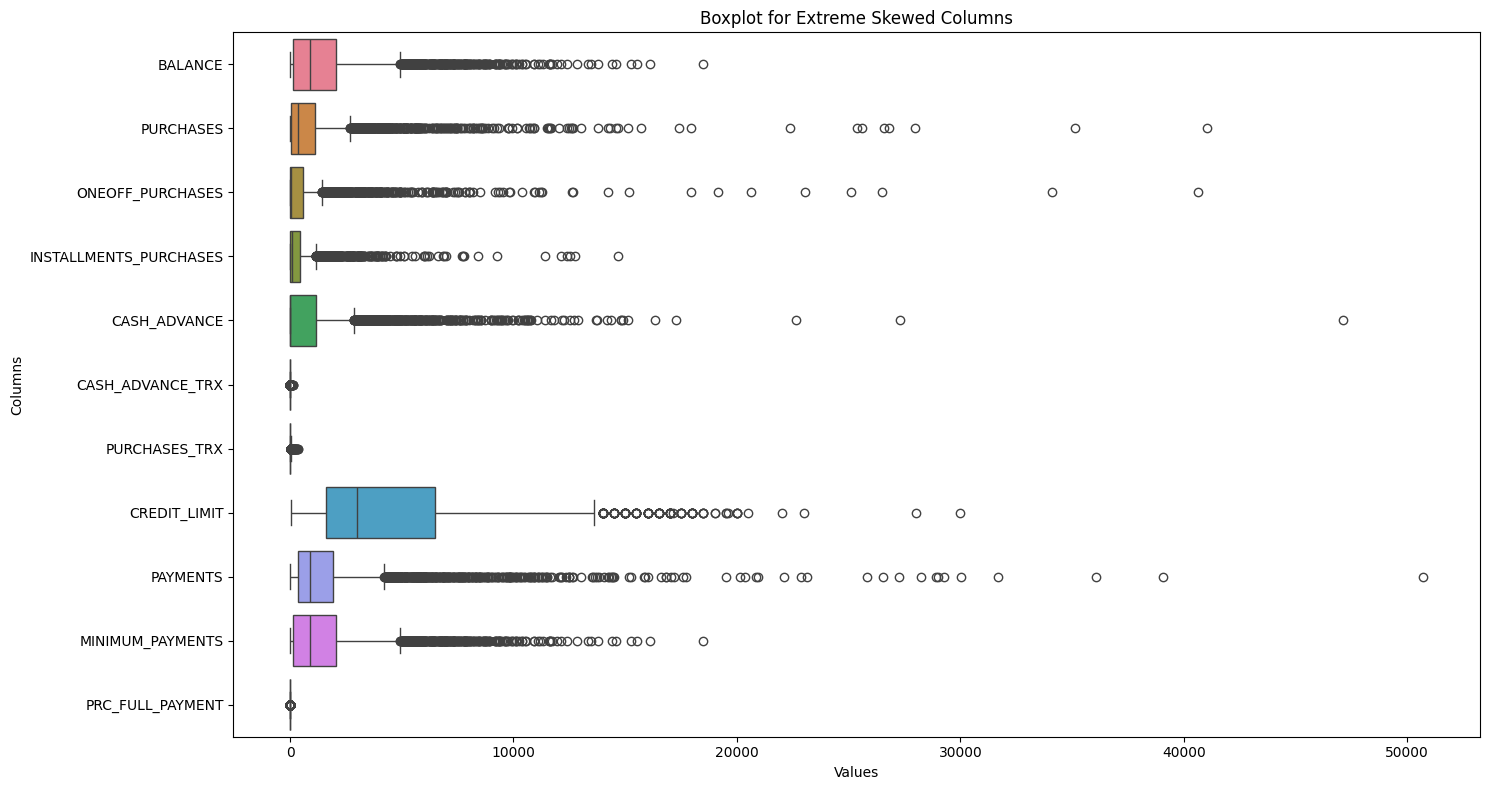

In [21]:
# Create a figure and 1 subplot
fig, ax = plt.subplots(figsize=(15, 8))

# Boxplot for extreme skewed columns
sns.boxplot(data=df[extreme_skewed_columns], orient="h", ax=ax)
ax.set_title("Boxplot for Extreme Skewed Columns")
ax.set_xlabel("Values")
ax.set_ylabel("Columns")

# Display the plot
plt.tight_layout()
plt.show()

The boxplot clearly visualizes the presence of outliers across various financial metrics, indicated by circles outside the typical range of the boxes. The circles outside the interquartile range (IQR) boxes represent values that are significantly higher or lower than the majority.

##### **ii. After Handling**

The outliers will be addressed using the capping method known as **Winsorizer**. Winsorizer replaces outlier values with either the maximum or minimum value of the columns. This method is suitable because it allows for the adjustment of extreme values without completely removing them from the dataset, preserving the overall distribution and avoiding potential data loss.

In [22]:
# Create function to apply winsorization
def apply_winsorization(df, variables, capping_method='iqr', tail='both', fold=3):
    winsoriser = Winsorizer(capping_method=capping_method, tail=tail, fold=fold, variables=variables)
    df_capped = winsoriser.fit_transform(df)
    return df_capped

# Apply to dataframe
df_capped = apply_winsorization(df, extreme_skewed_columns)

In [23]:
# For extreme skewed columns
calculate_outlier_percentages(df_capped, extreme_skewed_columns, method='skew', distance=3)

Percentage of outliers in BALANCE: 0.00%
Percentage of outliers in PURCHASES: 0.00%
Percentage of outliers in ONEOFF_PURCHASES: 0.00%
Percentage of outliers in INSTALLMENTS_PURCHASES: 0.00%
Percentage of outliers in CASH_ADVANCE: 0.00%
Percentage of outliers in CASH_ADVANCE_TRX: 0.00%
Percentage of outliers in PURCHASES_TRX: 0.00%
Percentage of outliers in CREDIT_LIMIT: 0.00%
Percentage of outliers in PAYMENTS: 0.00%
Percentage of outliers in MINIMUM_PAYMENTS: 0.00%
Percentage of outliers in PRC_FULL_PAYMENT: 0.00%


The Winsorizer method has effectively reduced the outlier percentages in each column to 0, demonstrating its successful implementation.

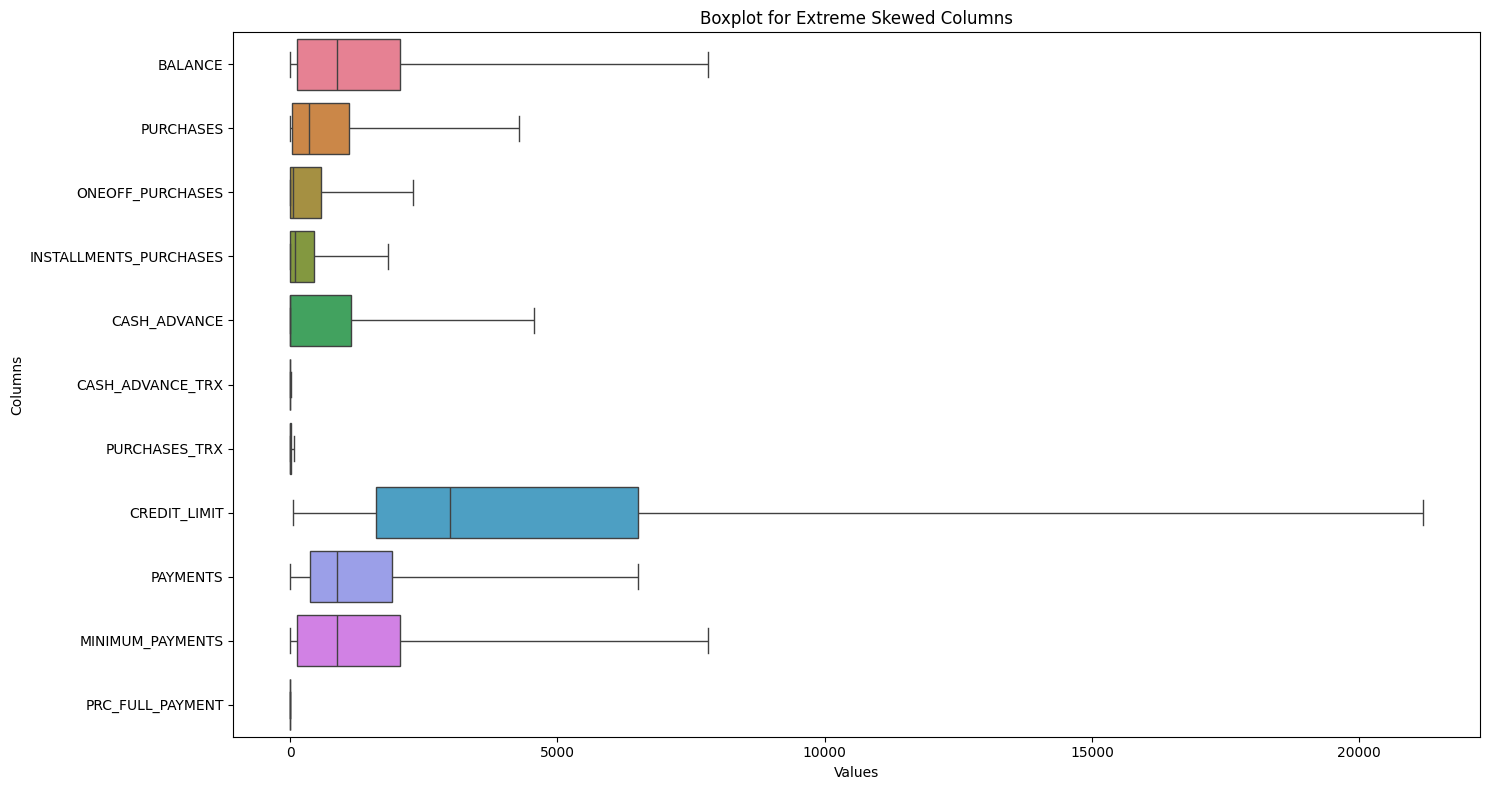

In [24]:
# Create a figure and 1 subplot
fig, ax = plt.subplots(figsize=(15, 8))

# Boxplot for extreme skewed columns
sns.boxplot(data=df_capped[extreme_skewed_columns], orient="h", whis=3, ax=ax)
ax.set_title("Boxplot for Extreme Skewed Columns")
ax.set_xlabel("Values")
ax.set_ylabel("Columns")

# Display the plot
plt.tight_layout()
plt.show()

The boxplot now shows no outliers, as seen by the lack of circles outside the box.

#### **iii. Feature Selection**

After handling the missing values and outliers, the next step involves selecting the most relevant features and reducing dimensionality to optimize the model's performance.

##### **i. Split between Numerical and Categorical Columns**

The first step is to separate between numerical columns and categorical encoded columns, as already mentioned before in Data Loading part.

In [25]:
# Define numerical columns
num = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

# Define categorical columns
cat_encoded = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
               'CASH_ADVANCE_FREQUENCY']

# Apply columns to the dataframe
df_num = df_capped[num]
df_cat = df_capped[cat_encoded]

# Show result
print('Numerical columns : ', num)
print('Categorical encoded columns : ', cat_encoded)

Numerical columns :  ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
Categorical encoded columns :  ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']


The separated columns are stored in a variable and applied to the dataframe. `df_num` contains numerical columns, while `df_cat` contains categorical columns.

##### **ii. Feature Standardization**

Before reducing the dimensions, the numerical columns need to be scaled first to ensure that all numbers range within the same scale. This normalization helps in achieving accurate and meaningful comparisons between different features, avoiding biases that may arise due to varying scales.

In [26]:
# Feature scaling
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_num)

The chosen scaler for this purpose is `MinMaxScaler` because all columns shows extreme skewness. This scaler is then applied to the numerical dataframe to normalize the data within a consistent range.

##### **iii. PCA**

After scaling the numerical columns, the next step is to reduce dimensions to simplify the dataset while retaining important information and patterns.

In [27]:
# Reduce dimensions using PCA
pca = PCA()
pca.fit(df_scaled)

PCA()

**Principal Component Analysis (PCA)** is used here in this process to reduce dimensionality of the data. PCA is a method that simplifies complex data by finding the most important patterns and relationships between variables. It does this by creating new variables, called **principal components**, that capture the most variation in the data. PCA looks from different angles to see the big picture without unnecessary details, making data analysis more efficient and effective. Overall, PCA is a powerful technique for preprocessing data, especially in cases where there are many correlated features or when dealing with high-dimensional datasets.

[Reference](https://www.analyticsvidhya.com/blog/2016/03/pca-practical-guide-principal-component-analysis-python/)

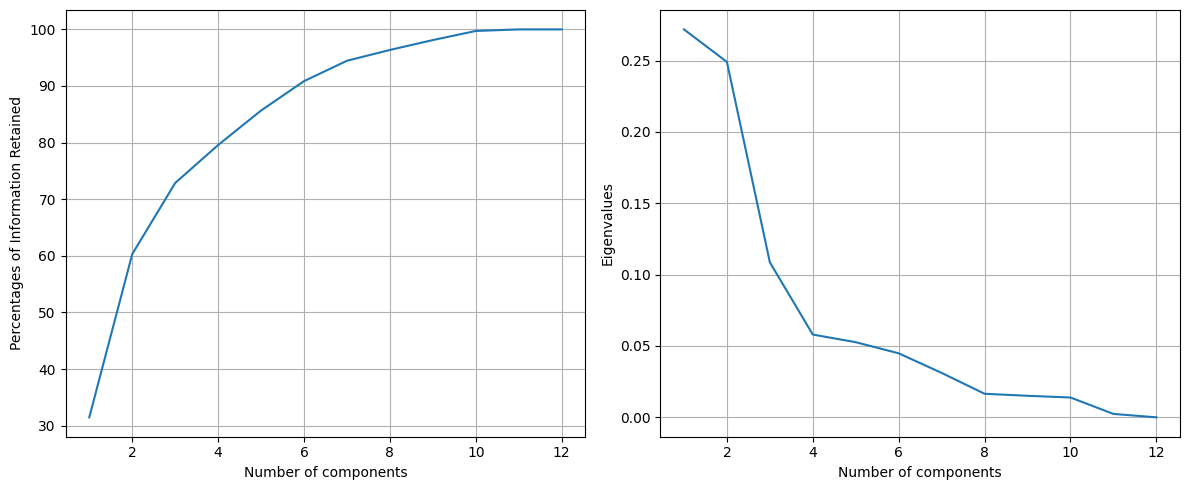

In [28]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for percentages of information retained
axes[0].grid()
axes[0].plot(range(1, 13), np.cumsum(pca.explained_variance_ratio_ * 100))
axes[0].set_xlabel('Number of components')
axes[0].set_ylabel('Percentages of Information Retained')

# Plot for eigenvalues
axes[1].grid()
axes[1].plot(range(1, 13), pca.explained_variance_ )
axes[1].set_xlabel('Number of components')
axes[1].set_ylabel('Eigenvalues')

plt.tight_layout()
plt.show()

- **Percentage of Information Retained (Explained Variance Cumulative)**:
The left graph displays the cumulative explained variance as a function of the number of principal components. It shows that with 2 components, about 60% of the variance is captured. This percentage increases sharply with each additional component, reaching about 90% with 6 components and near 100% by 10 components. This graph helps in deciding how many components are necessary to retain a significant portion of the data's variability without having to use all components.

- **Eigenvalues of Components**:
The right graph plots the eigenvalues associated with each principal component. Eigenvalues measure the amount of variance that is carried in each principal component. The typical rule of thumb is that a principal component is considered significant if its eigenvalue is greater than 1. In this graph, it is showed that the eigenvalues decrease rapidly after the first few components and flatten out towards the later components, suggesting that the initial components capture the majority of important information in the data.

In conclusion, these graphs indicate that a small number of principal components, which is approximately **6**, (where the explained variance reaches around 90%) are sufficient to capture most of the variability in the data, making it a practical choice for reducing dimensionality without losing critical information.

In [29]:
# Define PCA with choosen components
pca = PCA(n_components=0.90, random_state=5)
df_scaled_pca = pca.fit_transform(df_scaled)

print('Number of features : ', pca.n_components_)

Number of features :  6


While retaining **90%** of the variance in the original dataset, the number of components that PCA found is **6 components**. The output indicates that by using PCA, the dimensionality of the dataset has been reduced to 6 principal components.

##### **iv. Concatenate Columns**

After scaling and reducing the dimensionality of the numerical columns, the variables are combined with the categorical columns for **K-Prototypes** clustering purposes.

In [30]:
# Concatenate columns
df_concat = np.concatenate([df_scaled_pca, df_cat], axis=1)
df_concat = pd.DataFrame(df_concat, columns=[['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6'] + cat_encoded])
df_concat = df_concat.infer_objects()

df_concat

PCA1      PCA2      PCA3      PCA4      PCA5      PCA6  \
0    -0.482685 -0.378948 -0.198765 -0.107752  0.454980  0.276249   
1    -0.405094 -0.324282 -0.193736 -0.150378  0.381362  0.340432   
2    -0.341691 -0.225332 -0.179682 -0.133942  0.387886  0.282679   
3    -0.002499 -0.170415 -0.228141 -0.496313  0.435010  0.178880   
4    -0.292927 -0.290301 -0.256801 -0.263643  0.442215  0.327471   
...        ...       ...       ...       ...       ...       ...   
4470 -0.408300  1.348864  0.311813  0.112276 -0.282401  0.456280   
4471 -0.589860  0.320595  0.178183 -0.063839  0.358145 -0.264319   
4472 -0.505064  0.184495  0.051976 -0.052825  0.207598 -0.158317   
4473 -0.540524  0.184553  0.075667 -0.049864  0.239913 -0.152931   
4474 -0.444700  0.772610  0.250638 -0.048707  0.048231  0.120048   

     BALANCE_FREQUENCY PURCHASES_FREQUENCY ONEOFF_PURCHASES_FREQUENCY  \
0                0.125            0.125000                   0.125000   
1                0.000            0.125000                   0.125000   
2                0.875            0.125000                   0.125000   
3                0.375            0.125000                   0.125000   
4                1.000            0.125000                   0.125000   
...                ...                 ...                        ...   
4470             1.000            0.000000                   0.000000   
4471             1.000            0.000000                   0.000000   
4472             1.000            0.000000                   0.000000   
4473             1.000            0.000000                   0.000000   
4474             1.000            0.090909                   0.090909   

     PURCHASES_INSTALLMENTS_FREQUENCY CASH_ADVANCE_FREQUENCY  
0                                 0.0               0.000000  
1                                 0.0               0.000000  
2                                 0.0               0.000000  
3                                 0.0               0.000000  
4                                 0.0               0.000000  
...                               ...                    ...  
4470                              0.0               0.545455  
4471                              0.0               0.545455  
4472                              0.0               0.545455  
4473                              0.0               0.545455  
4474                              0.0               0.545455  

[4475 rows x 11 columns]

The DataFrame `df_concat` now has the PCA columns and categorical columns included. To proceed with K-prototypes, the index columns for the categorical columns needs to be defined to continue with further processes.

In [31]:
# Get the position of categorical columns
index_cat_columns = [np.where(array)[0][0] for array in [df_concat.columns.get_loc(col) for col in cat_encoded]]

print('Encoded Categorical columns        : ', cat_encoded)
print('Encoded Categorical columns index  : ', index_cat_columns)

Encoded Categorical columns        :  ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']
Encoded Categorical columns index  :  [6, 7, 8, 9, 10]


#### **iv. Finding Optimal Clusters**

There are 2 models used in this analysis:
- **K-Means**, which creates clusters based on numerical columns only.
- **K-Prototypes**, which creates clusters using both numerical and categorical columns.

Before clustering the datasets, the optimal number of clusters needs to be find first. There are many methods to find optimal clusters, but in this analysis, the chosen methods are:

- **Elbow Method** : The Elbow Method involves plotting the number of clusters against a metric such as the within-cluster sum of squares (WCSS) or distortion. The idea is to look for the "elbow point" on the plot, which is where the rate of decrease in the metric starts to slow down significantly. This point indicates a good balance between minimizing intra-cluster distance and avoiding overfitting.

- **Silhouette Method**:
The Silhouette Method measures how similar an object is to its own cluster compared to other clusters. It calculates the silhouette coefficient for each data point, which ranges from -1 to 1. A high silhouette coefficient indicates that the object is well-matched to its own cluster and poorly-matched to neighboring clusters. The optimal number of clusters is often chosen based on maximizing the average silhouette score across all data points.

##### **Scenario 1: K-Means Clusters**

This section uses only the `df_scaled_pca` variable, containing the scaled numerical columns processed with PCA.

##### **1. Elbow Method**

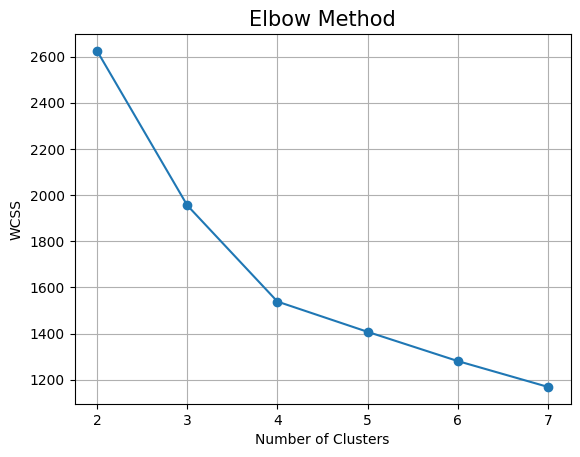

In [32]:
# Define empty list to store wcss values
wcss = []

# Iterate through a range of cluster numbers from 2 to 7
for i in range(2, 8):
    # Define KMeans model
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 15)
    km.fit(df_scaled_pca)
    wcss.append(km.inertia_)

# Plot the graph
plt.plot(range(2, 8), wcss, marker ="o")
plt.grid()
plt.title('Elbow Method', fontsize = 15)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

- **Within-Cluster Sum of Squares (WCSS)**: The y-axis represents the WCSS, which quantifies the variance within the clusters. A lower score means the points in a group are more alike, which is good.

- **Elbow Point**: The optimal number of clusters is typically determined where there is an "elbow" in the graph, which is the point after which the decrease in WCSS becomes more gradual. In this graph, the elbow appears to be at 4 clusters. This suggests that increasing the number of clusters beyond four doesn't really help make the points within the groups any more similar.

Based on this method, choosing 4 clusters would likely be the most effective balance between minimizing WCSS and avoiding too many clusters, which can complicate the model without much benefit. Nevertheless, this approach can be subjective and lead to varying interpretations among individuals. Hence, further analysis is necessary to identify the ideal number of clusters.

##### **2. Silhouette Method**

The silhouette method is used to validate the accuracy of the previous result.

In [33]:
def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Set up the figure and axis for silhouette and scatter plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

        # Set limits for the silhouette plot
        ax1.set_xlim([-0.2, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize and fit KMeans
        clusterer = KMeans(n_clusters=n_clusters, random_state=random_state)
        cluster_labels = clusterer.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(f"For n_clusters = {n_clusters}, the average silhouette_score is: {silhouette_avg}")

        # Compute silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate scores for samples in cluster i and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.viridis(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
            y_lower = y_upper + 10

        # Decorate the silhouette plot
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_title("Silhouette plot for the various clusters")
        ax1.set_xlabel("Silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # Prepare the scatter plot
        if isinstance(X, pd.DataFrame):
            scatter_x = X.iloc[:, 0]
            scatter_y = X.iloc[:, 1]
        else:
            scatter_x = X[:, 0]
            scatter_y = X[:, 1]

        colors = cm.viridis(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(scatter_x, scatter_y, s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

        # Draw white circles at cluster centers
        centers = clusterer.cluster_centers_
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')
        for i, center in enumerate(centers):
            ax2.scatter(center[0], center[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("Visualization of the clustered data")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(f"Silhouette analysis for KMeans clustering on sample data with n_clusters = {n_clusters}",
                     fontsize=14, fontweight='bold')
        plt.show()

For n_clusters = 2, the average silhouette_score is: 0.3826567750476999


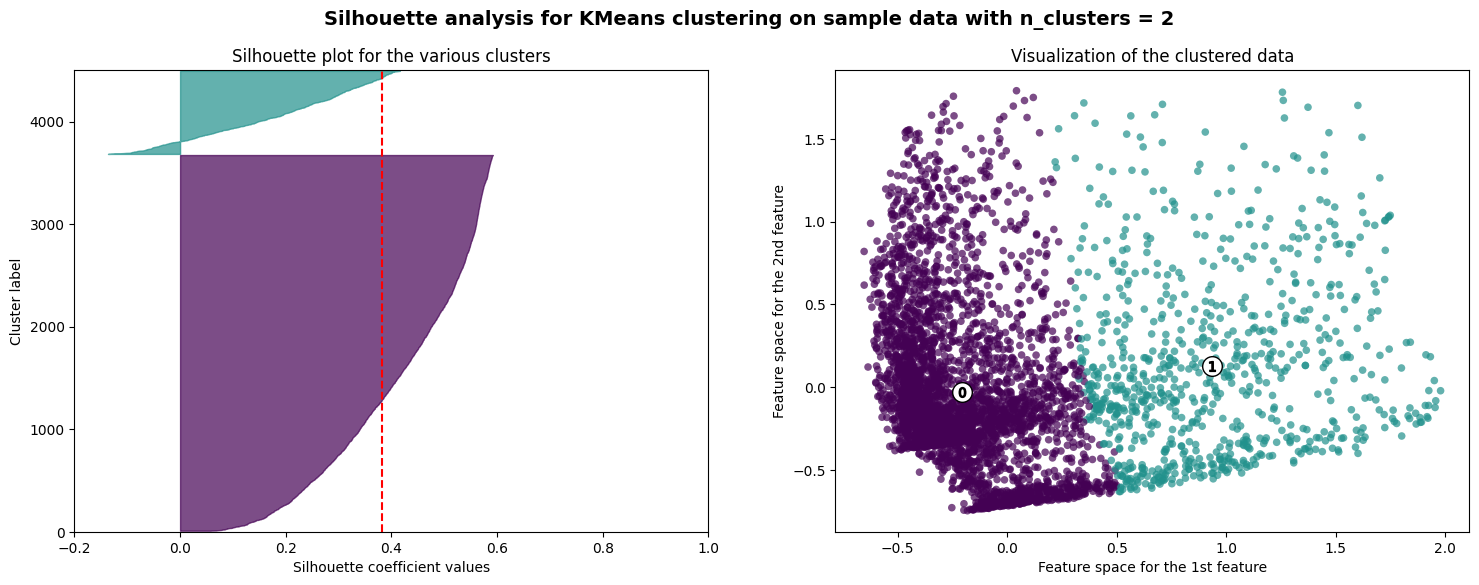

For n_clusters = 3, the average silhouette_score is: 0.3521249656607039


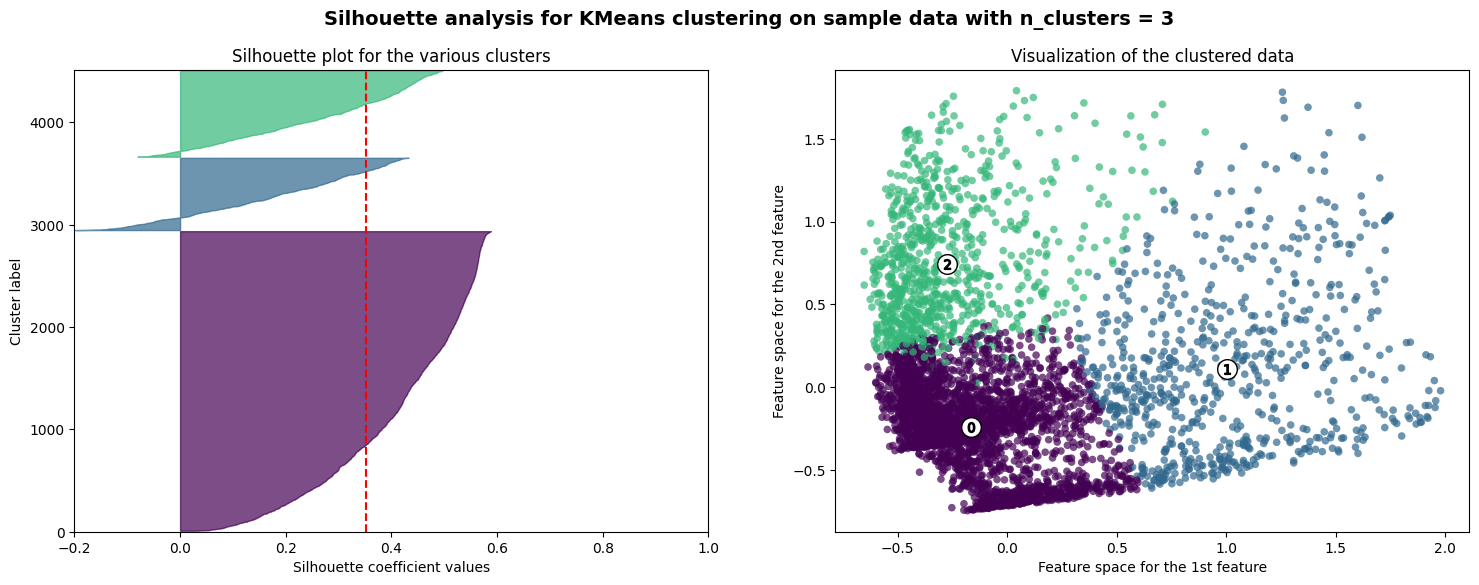

For n_clusters = 4, the average silhouette_score is: 0.3627658535408705


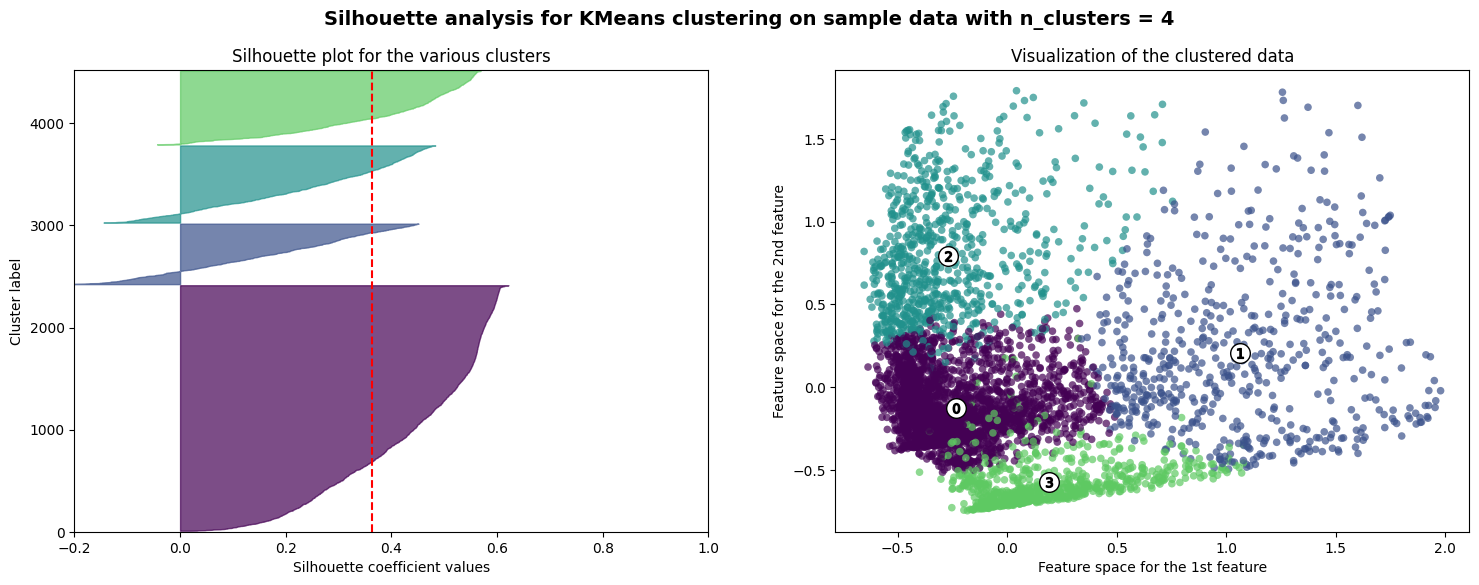

For n_clusters = 5, the average silhouette_score is: 0.3176190492233637


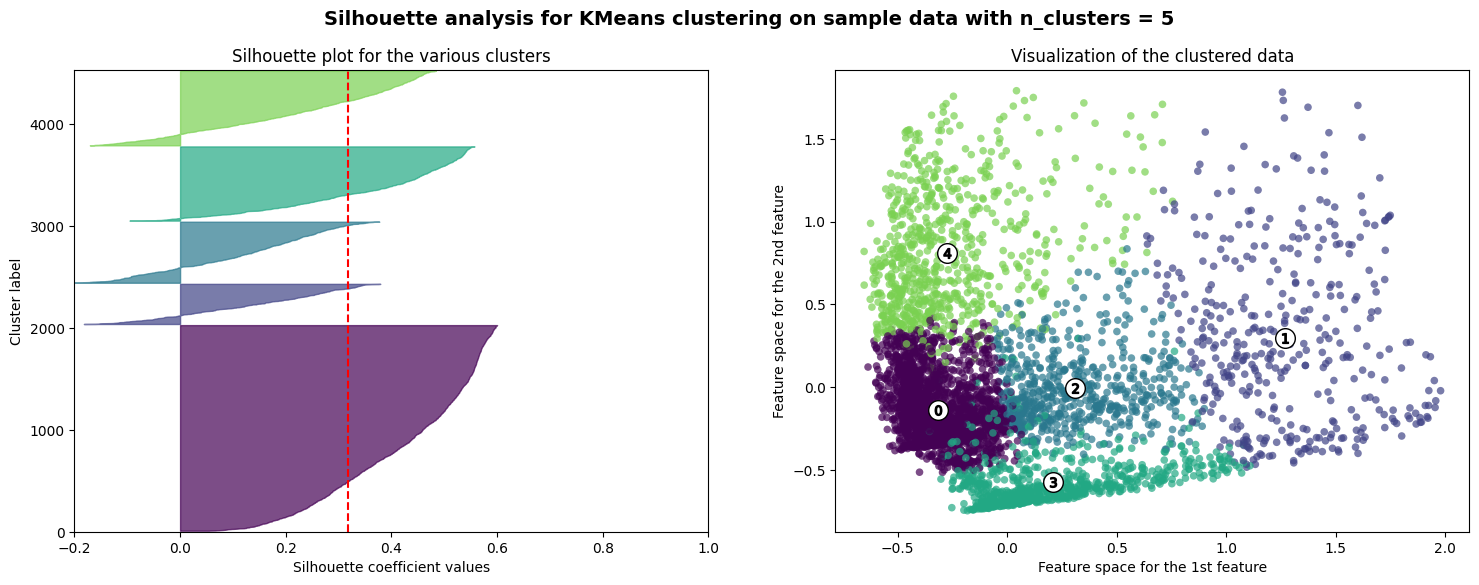

For n_clusters = 6, the average silhouette_score is: 0.34449736950840076


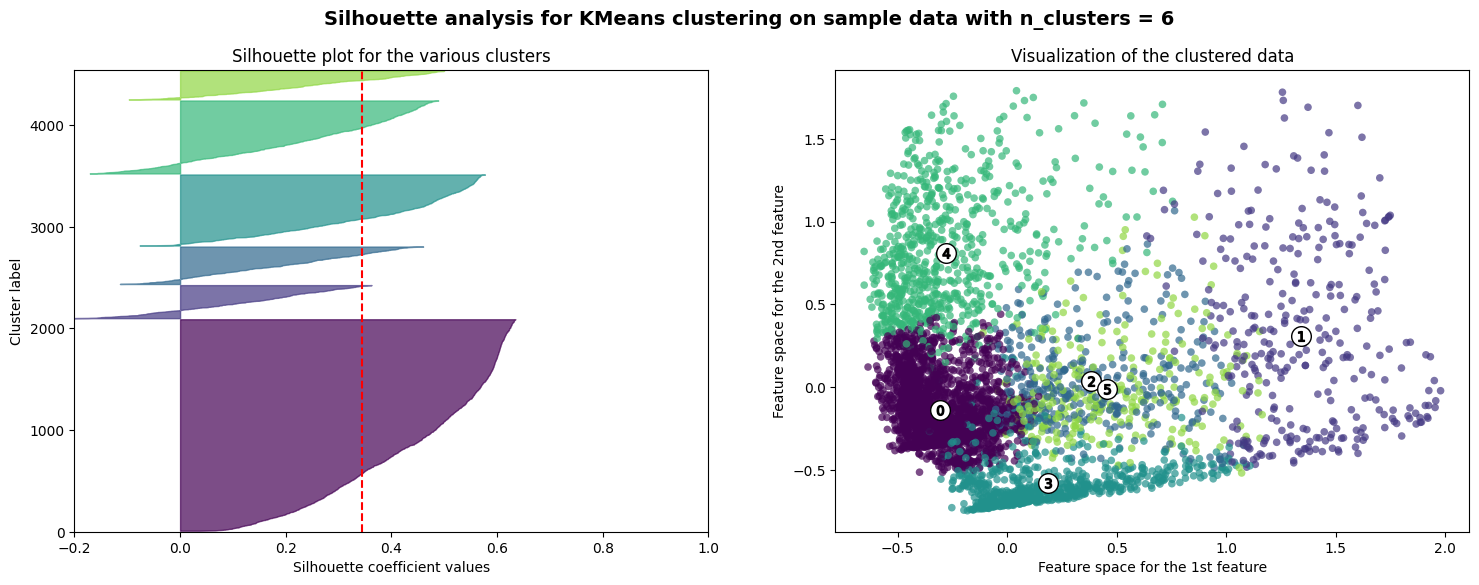

For n_clusters = 7, the average silhouette_score is: 0.348602771003379


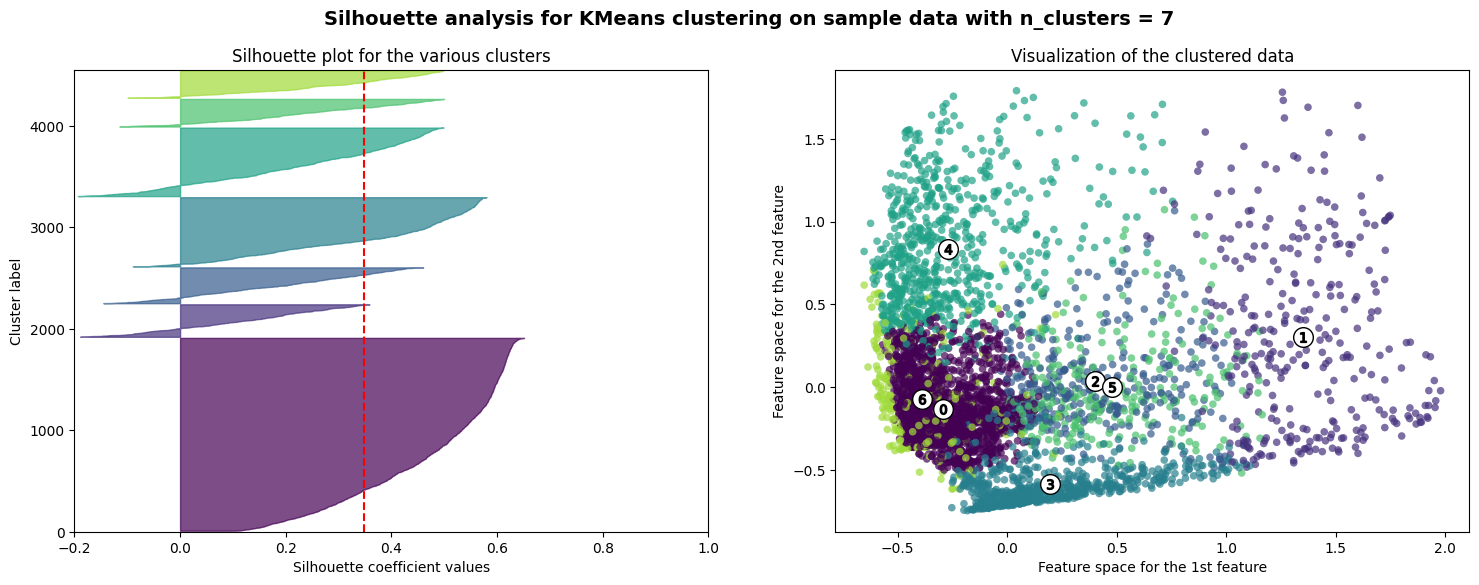

In [34]:
# Perform function
plot_silhouette(range(2, 8), df_scaled_pca, random_state=15)

When interpreting the silhouette score, there are a few aspects to consider:

- **Position Relative to the Red Line**: The red dashed line in the silhouette plot indicates the average silhouette score for the clusters. Each individual silhouette (representing a data point) should ideally be above this red line to indicate good clustering.

- **Highest Average Silhouette Score**: When comparing different cluster configurations, the setup with the highest average silhouette score is generally preferred. This score reflects how well-separated the clusters are and how compact the data points are within each cluster.

- **Uniformity in Cluster Widths**: The width of each silhouette reflects the size of the clusters. Ideally, clusters should have similar widths, which would suggest a balanced distribution of data points across clusters. Large discrepancies in widths can indicate that some clusters are fitting the data much better than others.

Despite cluster 2 having the highest average score, the analysis will focus on interpreting **cluster 4**, as the Elbow Method indicates that 4 clusters are optimal:

- The average silhouette score for four clusters is about **0.362**, which is quite high compared to other configurations.
- The silhouette plot shows that most of the data points in each cluster are above the average silhouette score (red line), suggesting effective clustering.
- The widths of the clusters in the silhouette plot appears to be almost balanced, indicating a good distribution of data points among the clusters.

Based on the two methods used, it can be concluded that the optimal number of clusters for **K-Means** is **4**.

##### **Scenario 2: K-Prototypes Clusters**

This section uses the `df_concat` variable, containing the scaled numerical columns processed with PCA and the categorical columns.

##### **1. Elbow Method**

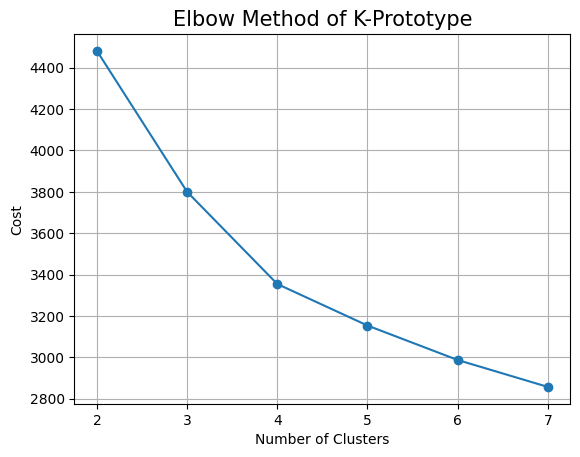

In [35]:
# Define empty list to store cost values
cost = []

# Iterate through a range of cluster numbers from 2 to 7
for k in range(2, 8):
  # Define KPrototypes model
  kproto = KPrototypes(n_clusters=k,
                       init='Huang',
                       random_state=15,
                       n_jobs=-1)
  kproto.fit_predict(df_concat, categorical=index_cat_columns)
  cost.append(kproto.cost_)

# Plot the graph
plt.plot(range(2, 8), cost, marker ="o")
plt.grid()
plt.title('Elbow Method of K-Prototype', fontsize = 15)
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.show()

The Elbow Method plot for K-Prototype clustering displays the cost, or within-cluster sum of squares, decreasing as the number of clusters increases from 2 to 7. The most significant change, or "elbow," is noted at **4** clusters. This suggests that four clusters is a good balance, offering a straightforward model that still captures the necessary details of the dataset effectively.

##### **2. Silhoutte Method**

For n_clusters = 2, the average silhouette_score is: 0.29491638414376325


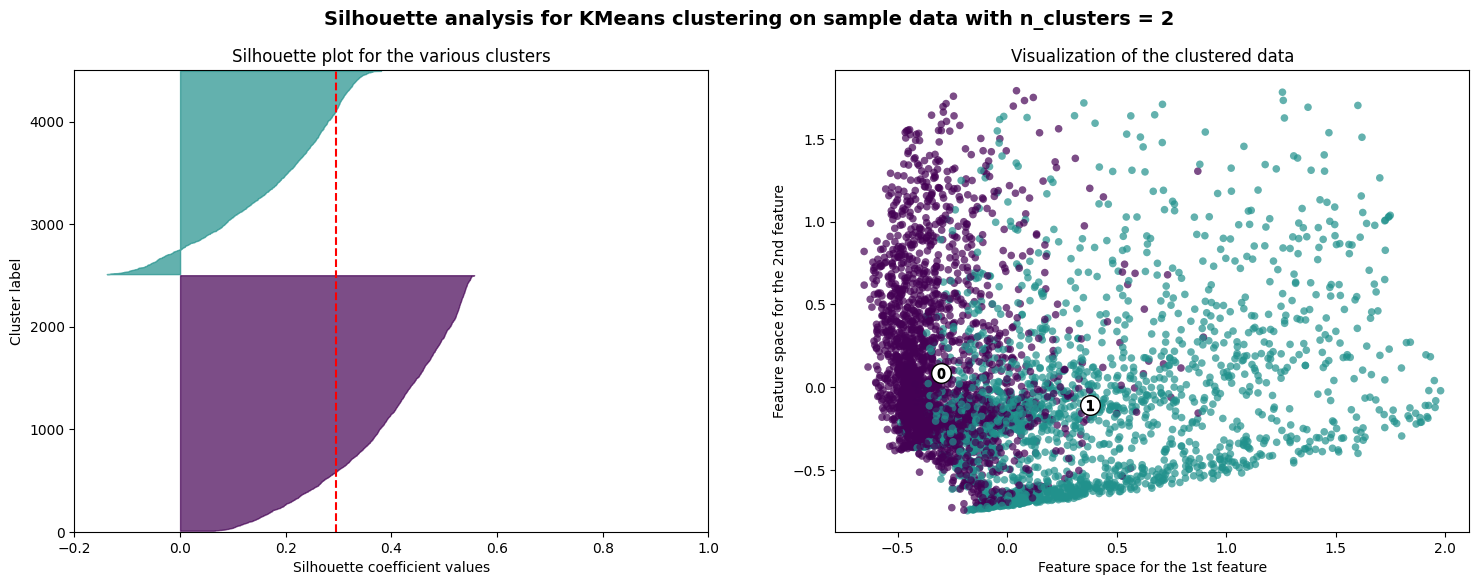

For n_clusters = 3, the average silhouette_score is: 0.2732670595263325


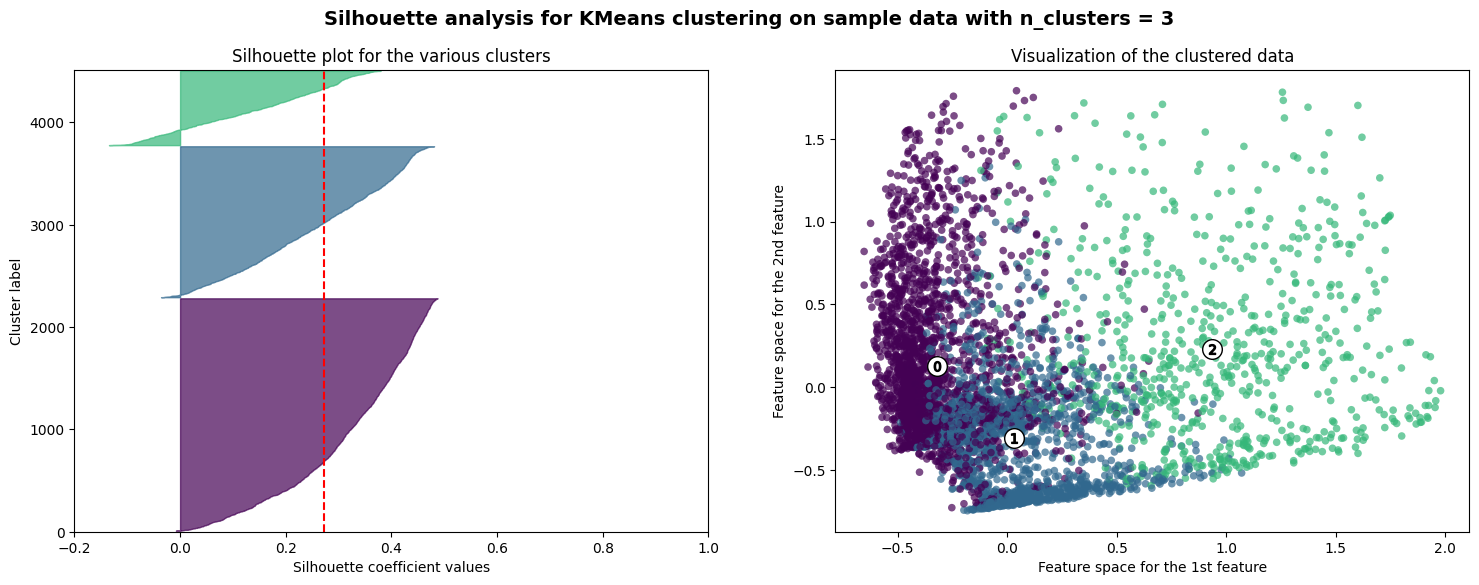

For n_clusters = 4, the average silhouette_score is: 0.2669449628980427


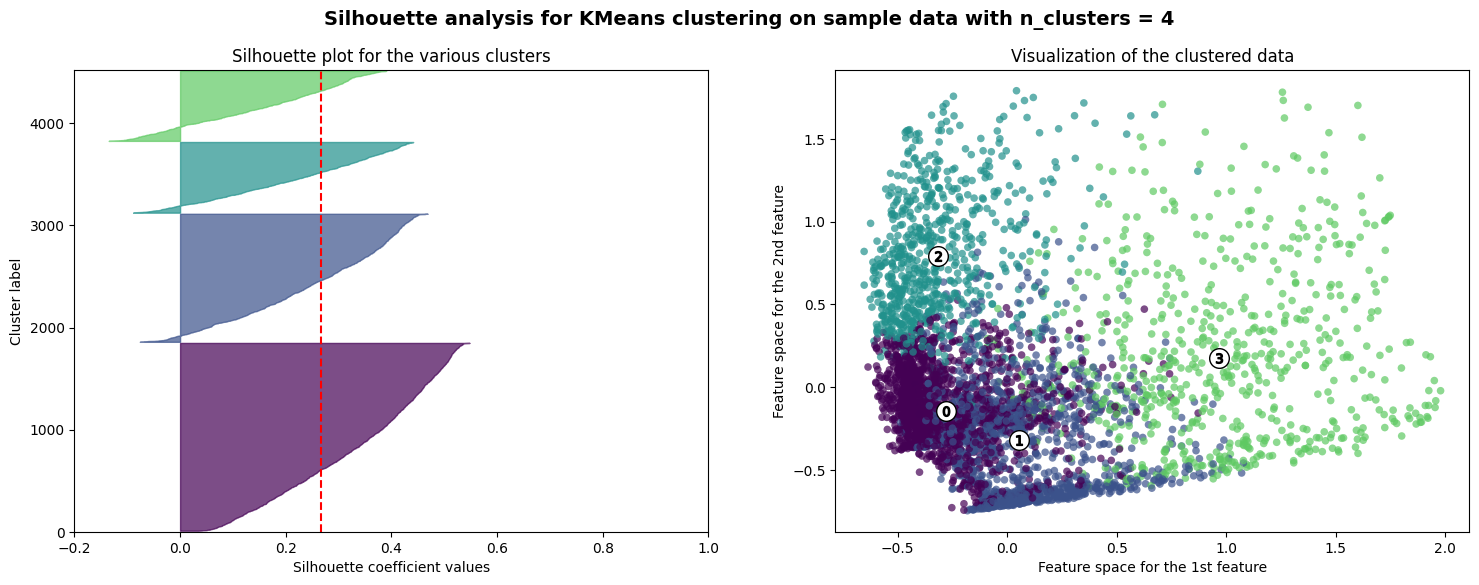

For n_clusters = 5, the average silhouette_score is: 0.2638899700646737


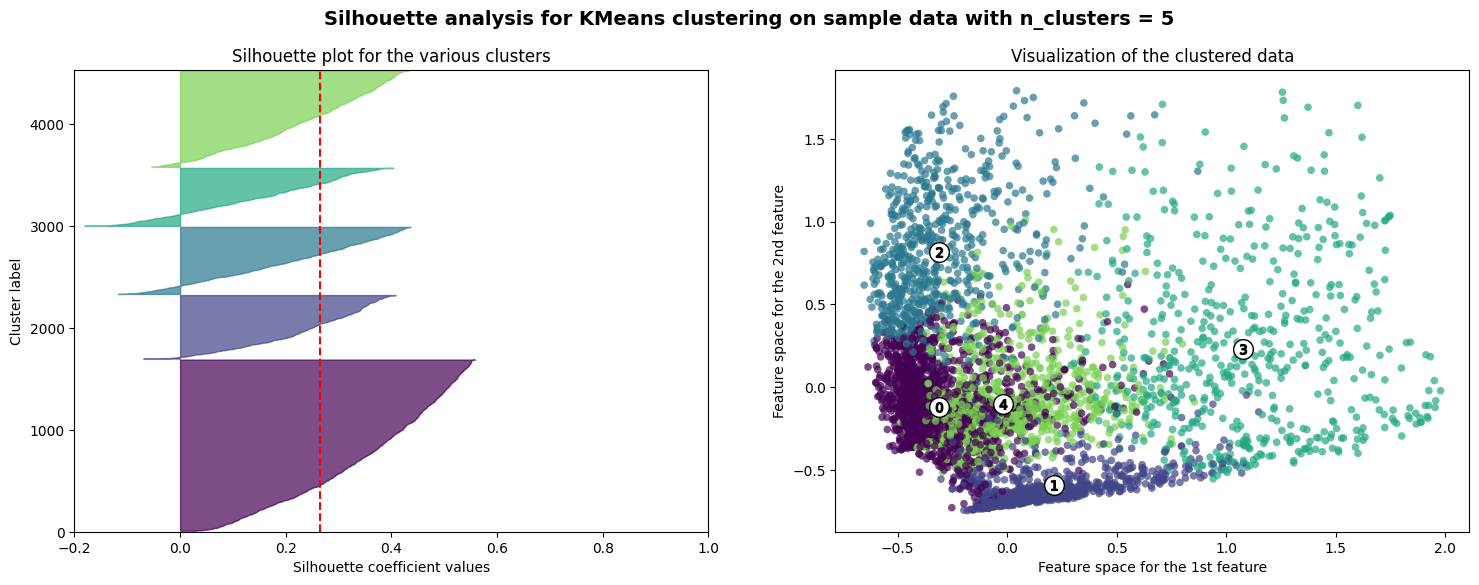

For n_clusters = 6, the average silhouette_score is: 0.27355826027635477


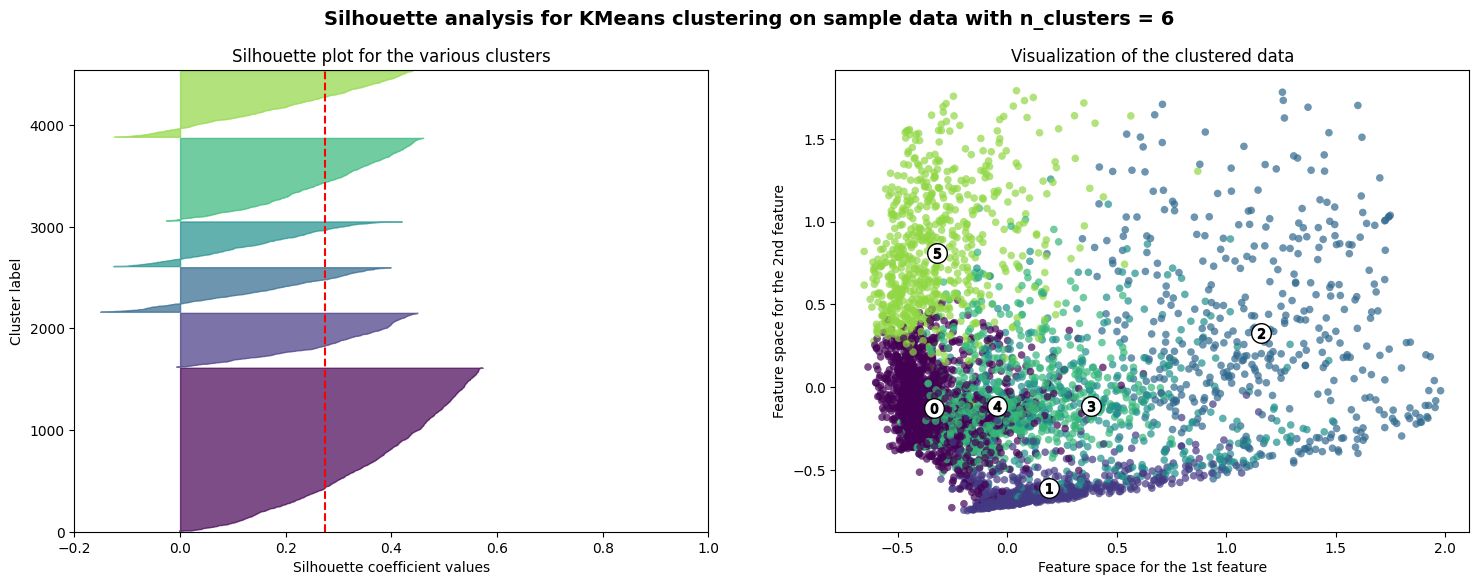

For n_clusters = 7, the average silhouette_score is: 0.2679902664810802


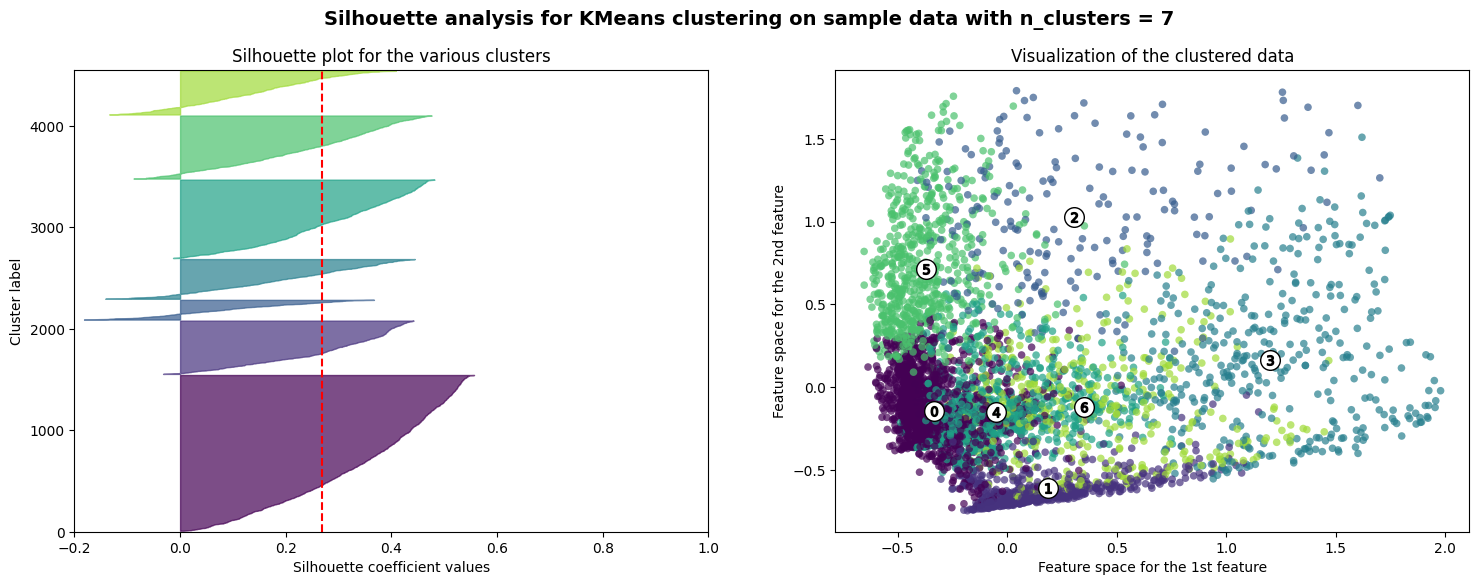

In [36]:
# Perform function
plot_silhouette(range(2, 8), df_concat, random_state=15)

The silhouette method also confirms that **4** clusters are the most optimal. This is indicated by the balanced widths between clusters, with all clusters above the average silhouette width.

Based on the two methods used, it can be concluded that the optimal number of clusters for **K-Prototypes** is **4**.

### **G. Model Definition**

This section defines the models used in the analysis, specifically **K-Means** and **K-Prototypes**. The choice of model is based on the dataset's characteristics; K-Means and K-Prototypes are selected as it's more suitable for clustering the data accurately compared to DBSCAN.

In [37]:
# Define models
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 15)
kp = KPrototypes(n_clusters = 4, random_state = 15)

### **H. Model Clustering**

After defining the model, it will predict the data and assign them to their respective clusters. K-Means will use the `df_scaled_pca` variable that only includes numerical data, while K-Prototypes will use the `df_concat` variable containing both numerical and categorical columns.

In [38]:
# Predict clusters
pred_km = km.fit_predict(df_scaled_pca)
pred_kp = kp.fit_predict(df_concat, categorical=index_cat_columns)

In [39]:
# Add clustering result to new columns
df['Cluster K-Means'] = pred_km
df['Cluster K-Prototypes'] = pred_kp

df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0        3.833185              0.125      45.00             45.00   
1        0.000000              0.000     176.03            176.03   
2      757.964752              0.875     157.40            157.40   
3      264.566591              0.375    1150.00           1150.00   
4      440.613643              1.000     600.00            600.00   
...           ...                ...        ...               ...   
4470  9629.808851              1.000       0.00              0.00   
4471  1040.030221              1.000       0.00              0.00   
4472  1322.818587              1.000       0.00              0.00   
4473  1060.391273              1.000       0.00              0.00   
4474  3447.674222              1.000     205.00            205.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                        0.0      0.000000             0.125000   
1                        0.0      0.000000             0.125000   
2                        0.0      0.000000             0.125000   
3                        0.0      0.000000             0.125000   
4                        0.0      0.000000             0.125000   
...                      ...           ...                  ...   
4470                     0.0   4372.393835             0.000000   
4471                     0.0   1390.648290             0.000000   
4472                     0.0    762.301096             0.000000   
4473                     0.0   1475.858013             0.000000   
4474                     0.0   4548.057776             0.090909   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.125000                               0.0   
1                       0.125000                               0.0   
2                       0.125000                               0.0   
3                       0.125000                               0.0   
4                       0.125000                               0.0   
...                          ...                               ...   
4470                    0.000000                               0.0   
4471                    0.000000                               0.0   
4472                    0.000000                               0.0   
4473                    0.000000                               0.0   
4474                    0.090909                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              1         500.0   
1                   0.000000                 0              1        7000.0   
2                   0.000000                 0              6        1200.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              1        1000.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0       12000.0   
4471                0.545455                18              0        1400.0   
4472                0.545455                11              0        1500.0   
4473                0.545455                10              0        2000.0   
4474                0.545455                 7              1       10500.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  \
0        0.000000          3.833185               0.0       8   
1        0.000000          0.000000               0.0       8   
2     1494.480376        757.964752               0.0       8   
3     3029.380326        264.566591               0.0       8   
4      215.316424        440.613643               0.0       8   
...           ...               ...               ...     ...   
4470  2468.988022       9629.808851               0.0      11   
4471   290.129620       1040.030221               0.0      11   
4

The DataFrame has been updated with two additional columns, one for clusters identified using K-Means and the other for clusters identified using K-Prototypes.

### **I. Model Visualization**

This section will present visual representations of the clustering performed using both **K-means** and **K-prototypes** methods.

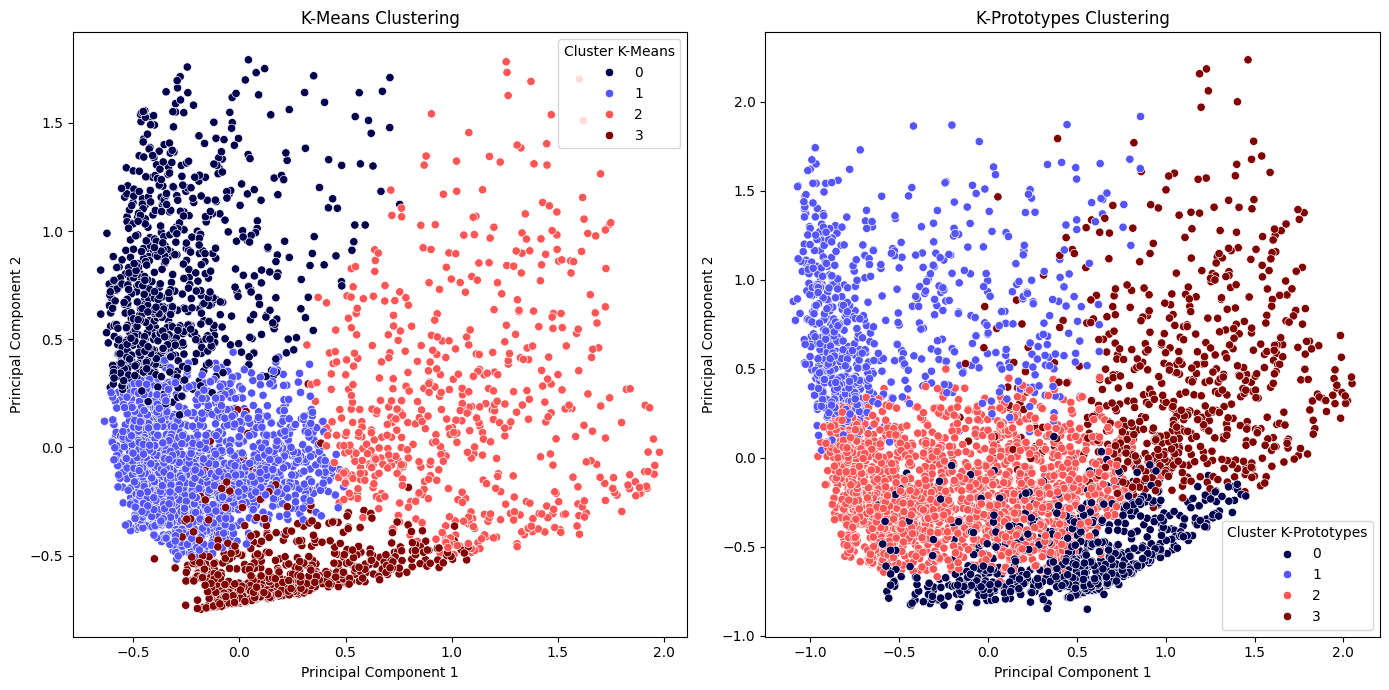

In [40]:
# PCA for K-Means scaled data
pca_2d_km = PCA(n_components=2)
df_2d_km = pca_2d_km.fit_transform(df_scaled)

# PCA for K-Prototypes concatenated data
pca_2d_kp = PCA(n_components=2)
df_2d_kp = pca_2d_kp.fit_transform(df_concat)

# Creating a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

# Plot for K-Means
sns.scatterplot(x=df_2d_km[:,0], y=df_2d_km[:,1], hue=df['Cluster K-Means'], palette='seismic', ax=ax1)
ax1.set_title('K-Means Clustering')
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')

# Plot for K-Prototypes
sns.scatterplot(x=df_2d_kp[:,0], y=df_2d_kp[:,1], hue=df['Cluster K-Prototypes'], palette='seismic', ax=ax2)
ax2.set_title('K-Prototypes Clustering')
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')

# Show result
plt.tight_layout()
plt.show()


The data has been reduced to two principal components, which allows to see how the data is distributed and clustered in two-dimensional space. Here are the key insights:

- **K-Means Clustering**: The clusters are mostly clear but some are mixed, especially the maroon and light blue ones. This method mainly sorts the data by how close and dense the points are in the space where features are projected. The boundary between the clusters (like between light blue and pink) is fairly obvious, but some points still mix together.

- **K-Prototypes Clustering**: This method displays a different pattern where the clusters are not as clearly separated, particularly between the navy and pink clusters. The boundaries aren't as distinct, likely because this method considers both categorical and numerical data.

In conclusion, K-Means provides a clear visual separation that's easy to interpret in terms of distance, while K-Prototypes might be reflecting a deeper, perhaps more abstract relationship in the data. For this analysis, **K-means** will be used as the chosen clustering method.

### **J. EDA After Clustering**

After clustering, performing EDA on the clustered data will help visualize the distribution and patterns within each cluster.

#### **i. Cluster Distribution**

The first visualization displays the composition distribution through a pie chart.

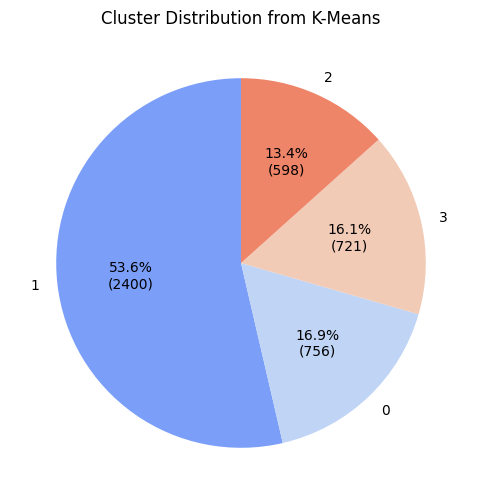

In [41]:
# Count the occurences of each clusters
cluster_counts = df['Cluster K-Means'].value_counts()

# Custom autopct function to show both percentage and value
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val})'
    return my_format

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct=autopct_format(cluster_counts),
        startangle=90, colors=sns.color_palette('coolwarm', n_colors=len(cluster_counts)))
plt.title('Cluster Distribution from K-Means')
plt.show()

**Cluster 1** is significantly larger than the others, suggesting it might contain the "typical" customer profile within this dataset. Meanwhile, **Clusters 0, 2, and 3** are smaller, which might indicate they represent more specific or extreme spending behaviors.

#### **ii. Finding Characteristics of Each Cluster**

The next visualization involves calculating the average value of each cluster to identify the characteristics unique to each cluster.

In [42]:
# Finding the average score from all clusters
df.groupby('Cluster K-Means').mean()

BALANCE  BALANCE_FREQUENCY    PURCHASES  \
Cluster K-Means                                                
0                4128.605545           0.955587   340.109603   
1                 977.990715           0.846781   399.839992   
2                2426.120796           0.970350  4543.723528   
3                 105.578139           0.817349   770.685506   

                 ONEOFF_PURCHASES  INSTALLMENTS_PURCHASES  CASH_ADVANCE  \
Cluster K-Means                                                           
0                      195.012593              145.142937   3969.232517   
1                      222.862129              177.118279    376.092238   
2                     3002.851957             1541.874916    709.876657   
3                      264.564730              506.192899    106.551851   

                 PURCHASES_FREQUENCY  ONEOFF_PURCHASES_FREQUENCY  \
Cluster K-Means                                                    
0                           0.259690                    0.111150   
1                           0.389563                    0.130096   
2                           0.899674                    0.616906   
3                           0.729624                    0.194354   

                 PURCHASES_INSTALLMENTS_FREQUENCY  CASH_ADVANCE_FREQUENCY  \
Cluster K-Means                                                             
0                                        0.171110                0.430819   
1                                        0.278352                0.091321   
2                                        0.698701                0.085902   
3                                        0.573041                0.017966   

                 CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT     PAYMENTS  \
Cluster K-Means                                                               
0                       12.416667       6.158730   6842.422238  2917.761361   
1                        1.582083       7.459167   3138.983796   830.823025   
2                        2.307692      56.595318   7199.331104  4589.553340   
3                        0.289875      14.432732   4303.674820  1168.490711   

                 MINIMUM_PAYMENTS  PRC_FULL_PAYMENT     TENURE  \
Cluster K-Means                                                  
0                     4128.605545          0.024079  11.441799   
1                      977.990715          0.019810  11.509583   
2                     2426.120796          0.220356  11.871237   
3                      105.578139          0.658436  11.334258   

                 Cluster K-Prototypes  
Cluster K-Means                        
0                            1.018519  
1                            1.984583  
2                            2.988294  
3                            0.072122

However, to visualize the characteristics easier, the average value will be plotted down below.

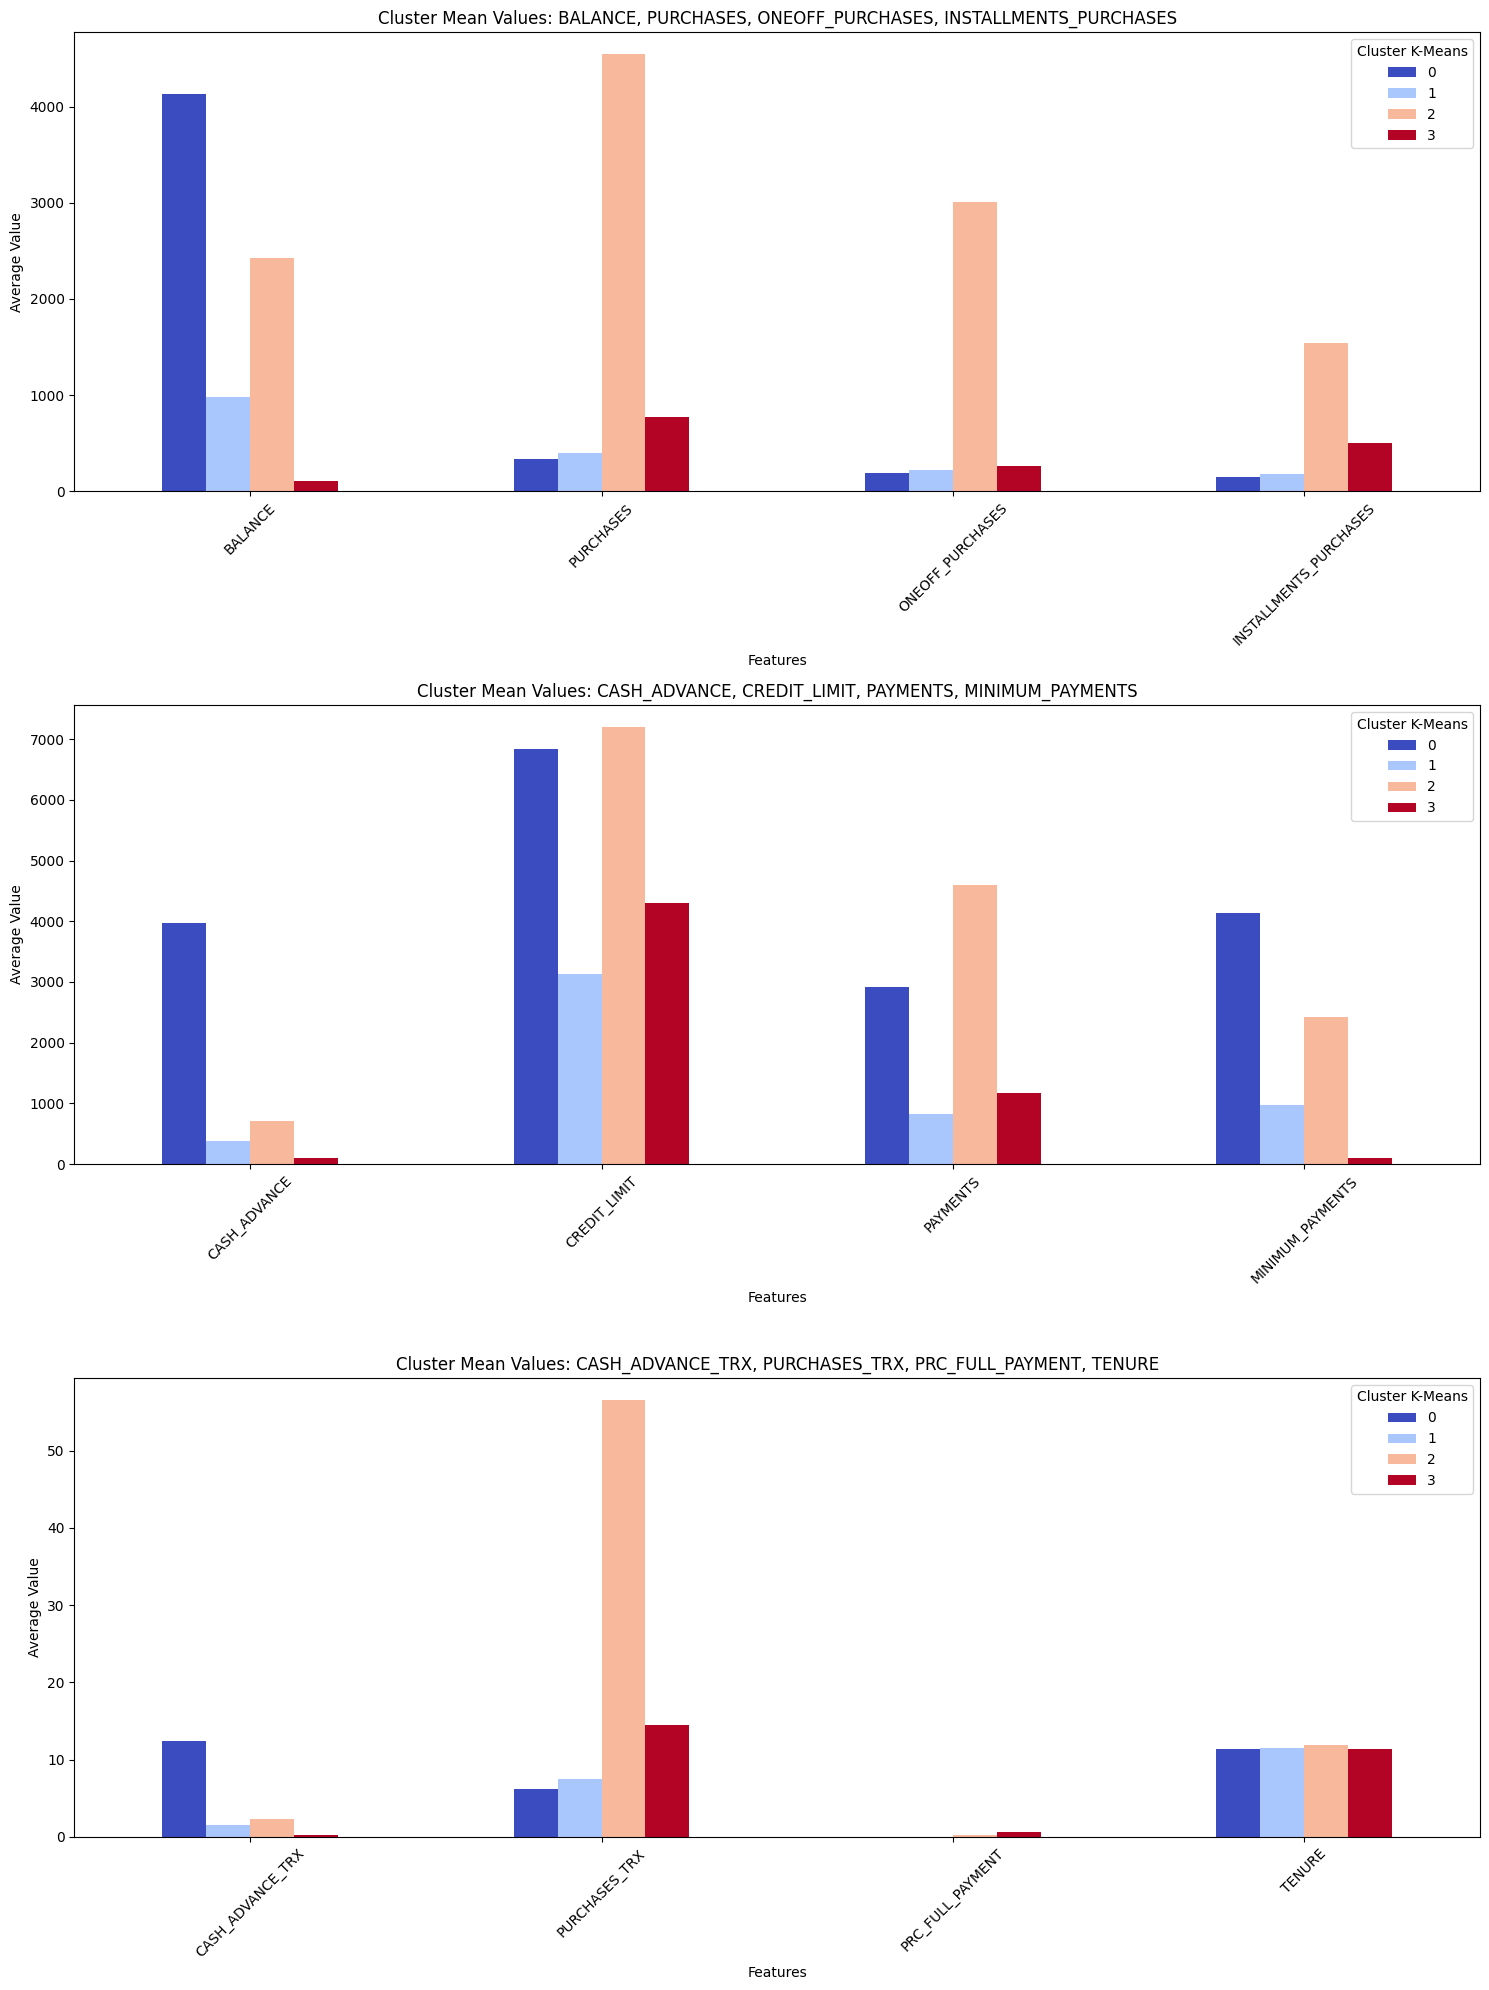

In [43]:
# Define the features for each subplot
feature_groups = {'Group 1': ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES'],
                  'Group 2': ['CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS'],
                  'Group 3': ['CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PRC_FULL_PAYMENT', 'TENURE']}

# Calculate the mean of all numerical features for each cluster
cluster_means = df.groupby('Cluster K-Means').mean()

# Create a 3x1 subplot
fig, axes = plt.subplots(3, 1, figsize=(15, 20))
axes = axes.flatten()

# Plotting each group in its own subplot
for i, (title, features) in enumerate(feature_groups.items()):
    cluster_means[features].T.plot(kind='bar', ax=axes[i], colormap='coolwarm')
    axes[i].set_title(f'Cluster Mean Values: {", ".join(features)}')
    axes[i].set_ylabel('Average Value')
    axes[i].set_xlabel('Features')
    axes[i].set_xticklabels(features, rotation=45)

# Show result
plt.tight_layout()
plt.show()


- **Cluster 0**: Shows the significantly highest average values in `BALANCE`, `MINIMUM_PAYMENTS`, and `CASH_ADVANCE`, `CASH_ADVANCE_TRX`, alongside moderate purchasing activity. This could represent customers who are heavily reliant on their credit facilities, potentially reflecting higher levels of debt management. These individuals might be using their credit cards for cash needs as well as managing larger ongoing balances, which indicates a comfort with using credit but also potentially higher financial risk or more complex financial needs.

- **Cluster 1**: This cluster has relatively low average values across all features, suggesting these might be customers minimal credit activity, possibly newer or very cautious users who prefer to maintain low balances and avoid high spending. This group represents a low-risk segment with minimal engagement in credit-driven transactions, potentially maintaining their credit cards more for security or specific, occasional needs rather than regular use.

- **Cluster 2**: Characterized by the highest purchases and payments as shown by the highest `PURCHASES`, `ONEOFF_PURCHASES`, `PAYMENTS`, and `INSTALLMENTS_PURCHASES`, which suggests these are the big spenders. They engage in both regular and one-time high-value purchases but have moderate values in `CASH_ADVANCE`. This indicates that while they are active in using their credit for purchasing, they do not rely heavily on cash advances, suggesting a preference for planned or spontaneous spending through their credit cards rather than cash liquidity.

- **Cluster 3**: Exhibits very low values in `BALANCE`, `MINIMUM_PAYMENTS`, `CASH_ADVANCE_TRX`, and `CASH_ADVANCE`. This suggests these customers may have minimal debt or outstanding balances and are perhaps cautious or infrequent users of their credit facilities. This could indicate a segment of customers who either pay off their balances quickly or use their credit cards sparingly, avoiding larger or more frequent cash advances. Their financial discipline suggests they are managing their finances prudently to avoid falling into debt.

#### **iii. Correlation Analysis**

The final visualization aims to check the correlation between two variables based on their clusters.

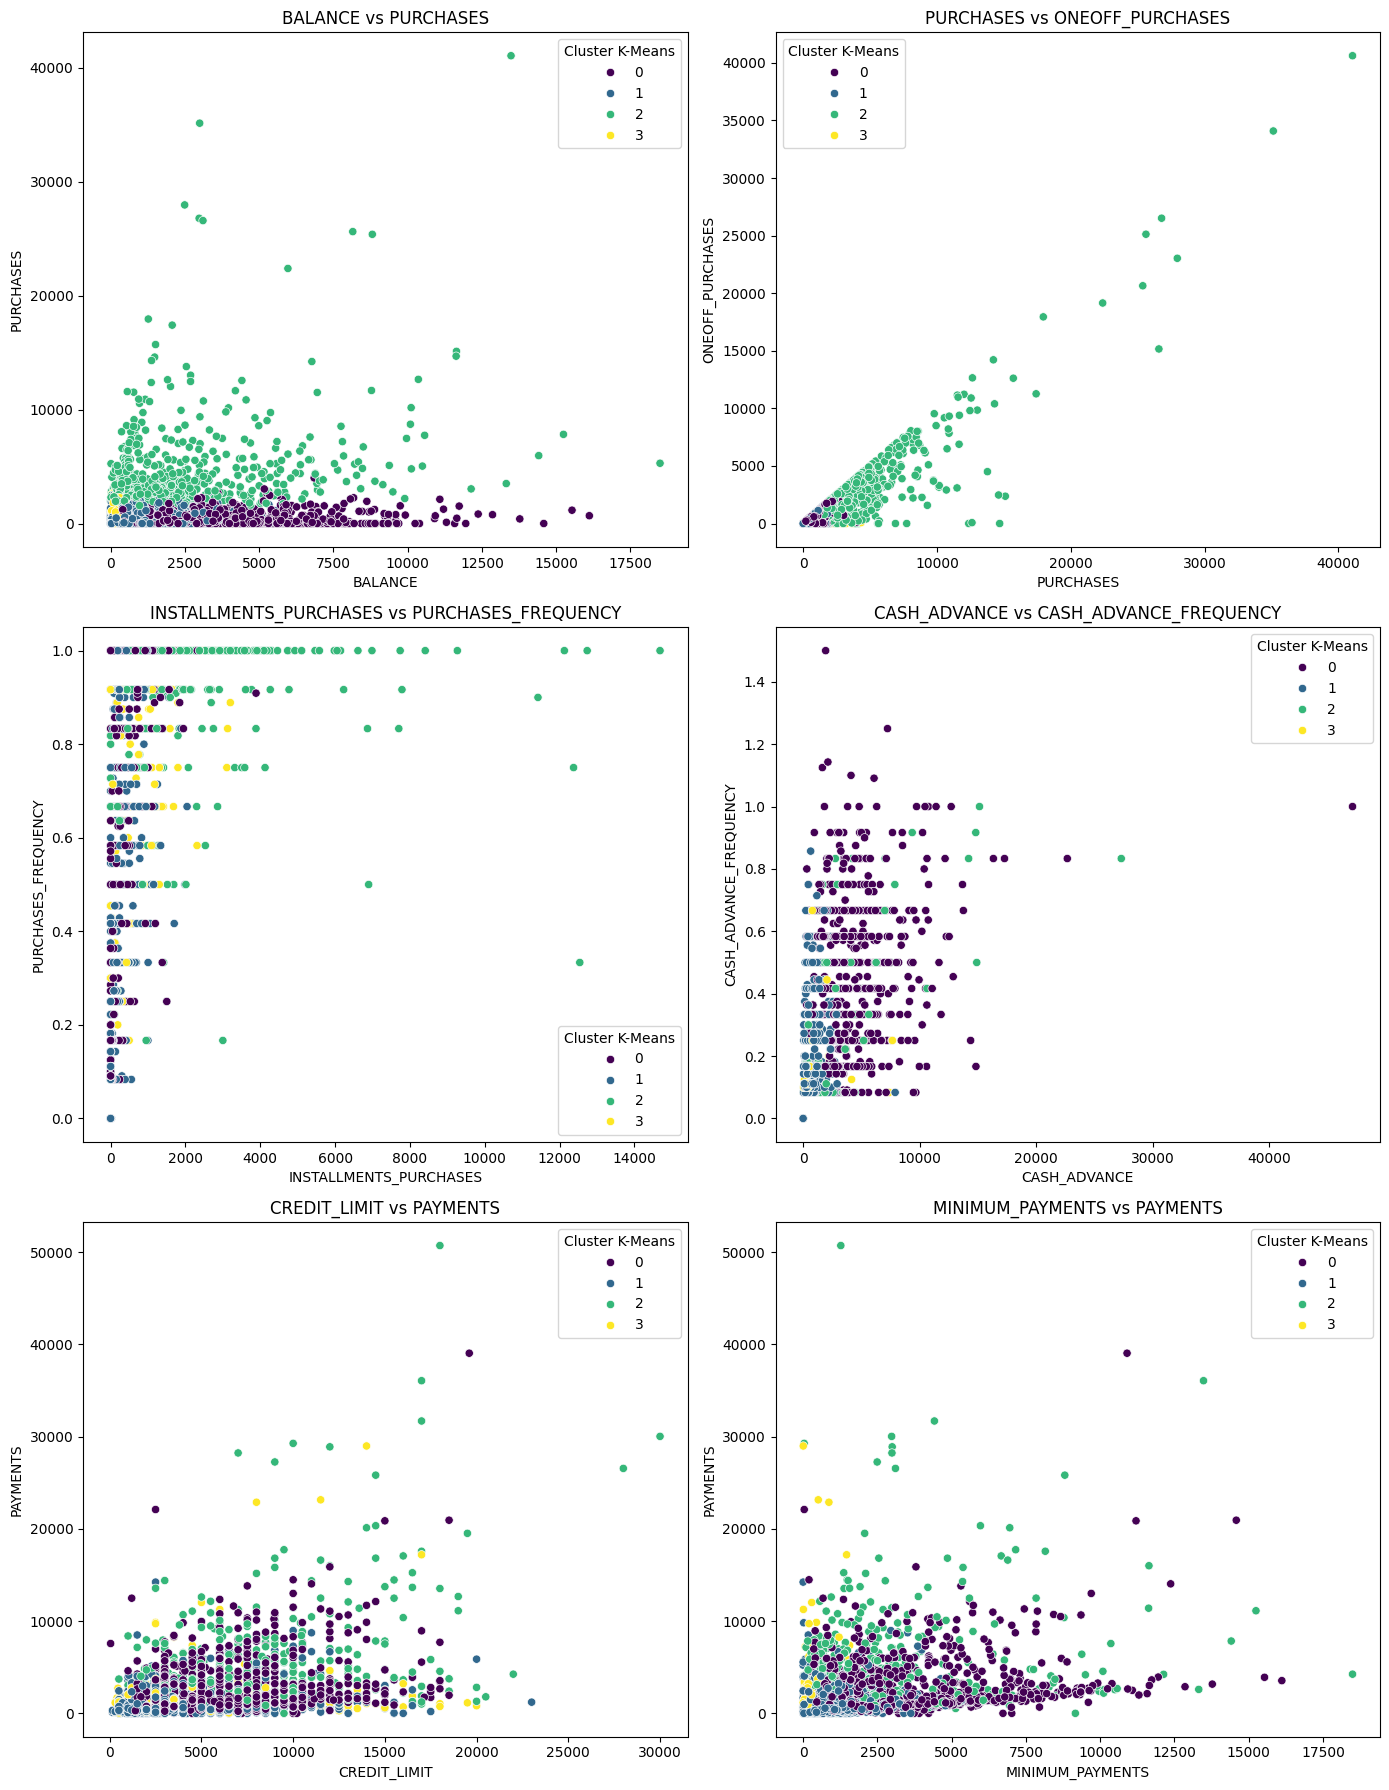

In [44]:
# Define pairs
pairs = [('BALANCE', 'PURCHASES'),
         ('PURCHASES', 'ONEOFF_PURCHASES'),
         ('INSTALLMENTS_PURCHASES', 'PURCHASES_FREQUENCY'),
         ('CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY'),
         ('CREDIT_LIMIT', 'PAYMENTS'),
         ('MINIMUM_PAYMENTS', 'PAYMENTS')]

# Create a 3x2 subplot
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
for i, (x, y) in enumerate(pairs):
    ax = axes[i // 2, i % 2]
    sns.scatterplot(data=df, x=x, y=y, hue='Cluster K-Means', palette='viridis', ax=ax)
    ax.set_title(f'{x} vs {y}')
    ax.set_xlabel(x)
    ax.set_ylabel(y)

# Show result
plt.tight_layout()
plt.show()

1. **BALANCE vs PURCHASES**:  
Clusters indicate varying behavior in balance and purchase amounts. Lower balances are seen in Cluster 0 with moderate purchases, while Cluster 2 contains accounts with high balances but lower purchases. Clusters 1 and 3 show a mix of high balances and varied purchasing behaviors.

2. **PURCHASES vs ONEOFF_PURCHASES**:
A clear trend shows total purchases increasing with one-off purchases, particularly in Cluster 2 which indicates frequent, high one-off purchases. Cluster 0 has the least amount of both types of purchases.

3. **INSTALLMENTS_PURCHASES vs PURCHASES_FREQUENCY**:
Different patterns of installment purchases relative to the frequency are observed, with Cluster 2 showing frequent high purchases. This might suggest a preference for frequent, high-value transactions.

4. **CASH_ADVANCE vs CASH_ADVANCE_FREQUENCY**:
Clusters 0 and 2, characterized by higher cash advances and more frequent use, possibly indicate a higher reliance on cash advances among these users.

5. **CREDIT_LIMIT vs PAYMENTS**:
Wide-ranging payment behaviors across various credit limits are observed without clear clustering based on credit limit, suggesting diverse credit utilization strategies among the clusters.

6. **MINIMUM_PAYMENTS vs PAYMENTS**:
Trends suggest that those with lower minimum payments tend to make payments closer to their required minimum, while higher minimum payments see more variability. Cluster 1 is characterized by closer adherence to minimum payment amounts, perhaps indicating tighter financial management.

### **K. Model Saving**

Finally, the K-Means model and other related files are saved using pickle and JSON formats for testing in the inference notebook.

In [45]:
# Save trained model
with open('km.pkl', 'wb') as model_file:
    pickle.dump(km, model_file)

# Save MinMaxScaler
with open('scaler.pkl', 'wb') as minmax_file:
    pickle.dump(scaler, minmax_file)
    
# Save PCA
with open('pca.pkl', 'wb') as pca_file:
    pickle.dump(pca, pca_file)

# Save numerical columns
with open('num.json', 'w') as num_std_file:
    json.dump(num, num_std_file)

### **L. Model Inference**

This section will be performed in a separate file named **'P1G6_Set_1_livia_amanda_inference.ipynb'**.

### **M. Conceptual Problems**

##### **i. Inertia in K-Means**

<center>

<img src="./inertia.jpeg" width="400" height="300">
</center>

K-Means is one of the clustering models that uses an iterative process to group unlabeled data into K clusters based on cluster centers (centroids). It selects data for each cluster to minimize the average distance to its centroid. How it works:

1. Initially, K centroids are randomly placed for the clusters.
2. Each data point is assigned to the nearest centroid.
3. Centroid positions are updated based on the data point locations.

These steps are repeated until data points stop changing clusters and centroids stabilize.

In K-Means, **inertia** is a metric that measures how well the data was clustered. It calculates the squared distances between each data point and its centroid, summing these squared distances within each cluster. Inertia decreases as the number of clusters increases. Hence, choosing the right number of clusters (K) involves balancing the inertia value and the number of clusters. A good model strikes a balance between low inertia and a manageable number of clusters, as increasing K decreases inertia but can lead to overfitting.

[Reference 1](https://www.codecademy.com/learn/dspath-unsupervised/modules/dspath-clustering/cheatsheet)  
[Reference 2](https://towardsdatascience.com/an-approach-for-choosing-number-of-clusters-for-k-means-c28e614ecb2c)

##### **ii. Elbow Method**

As previously mentioned, there is a trade-off between K and inertia. For determining the optimal number of K for a dataset, the **Elbow Method** is applied in data analysis and machine learning. It plots the Within-Cluster Sum of Squares (WCSS) against different K values, showing how much data points vary within clusters. The "elbow" point in the plot, where the rate of decrease slows down, indicates the optimal K.

**Reasons**

This analysis uses the Elbow Method initially because it provides a straightforward way to identify a potential number of clusters through its graph. By determining the initial K can avoid running the clustering algorithm with an excessively high number of clusters, which can be computationally expensive and may not result meaningful improvements in clustering quality.

**How it works**

For every K value between 1 and n (a chosen hyperparameter), the Within-Cluster Sum of Squares (WCSS) is calculated, measuring squared distances between centroids and data points.  As K increases, WCSS decreases. Plotting K against WCSS shows an "elbow" point where the graph begins to straighten, indicating the optimal K value for clustering analysis.

**Advantages**

- Simple to apply and provides a clear visual representation.
- A valuable starting point for selecting the number of clusters.
- Offers an intuitive understanding of cluster formation based on the elbow point

**Disadvantages**

- Can be subjective, which needs to be validated using another method.
- May not work well for data sets that do not have a clear elbow or have noisy or skewed data.
- Sensitive to initial cluster centroids, which can affect the WCSS values and the choice of the optimal K.

[Reference 1](https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/)  
[Reference 2](https://www.linkedin.com/advice/1/what-advantages-disadvantages-different-methods-1e#:~:text=1%20Elbow%20method,-The%20elbow%20method&text=The%20advantage%20of%20this%20method,have%20noisy%20or%20skewed%20data.)

### **N. Analysis**

#### **i. EDA**

- **Correlation Patterns**: The correlation matrix suggests strong associations between one-off purchases and overall purchases, cash advance amounts and the number of transactions, as well as between purchase frequency and installment purchases, but indicates a weak correlation between purchase amounts and balances.

- **Financial Habits**: The histograms show that most people keep their credit card balances and spending at low levels. They also tend to have lower credit limits and make smaller payments. This suggests that people are being careful with their money and not taking on too much debt.

- **Usage Diversity**: The histograms reveal diverse patterns of credit card usage among cardholders, ranging from consistent updating of balances and frequent purchases for some users to rare utilization of cash advances and one-off purchases, reflecting varied financial behaviors and preferences.

- **Purchase Preferences**: The bar chart indicates a preference among cardholders for higher-value one-off purchases over installment purchases, likely driven by the desire to make larger transactions less frequently rather than spreading payments over time.

#### **ii. Business Insight**

- **Reward Program**: Create reward programs based on spending habits, offering cashback for high-value one-off purchases and discounts for frequent smaller purchases.

- **Financial Education and Tools**: Focus on financial education and tools in mobile apps to help users manage finances and avoid debt.

- **Segmented Marketing Strategies**: Develop personalized marketing strategies targeting different user segments, such as promotions for frequent users and targeted messaging for occasional users to increase engagement.

- **Flexible Payment Options**: Introduce flexible payment options for high-value purchases and highlight benefits like extended warranties or purchase protection.

#### **iii. Model Performance**

- **Clustering Capability**:  The model effectively performs customer segmentation, highlighting its clustering capabilities.

- **Segmentation Result**:

    - **Cluster 0: Credit-Reliant Users**   
        Customers with significantly high balances, minimum payments, cash advance transactions, and cash advances. They heavily rely on credit facilities, indicating higher debt management and potentially higher financial risk.

    - **Cluster 1: Minimalist Users**  
        Customers with minimal credit activity, low balances, and minimal engagement in credit-driven transactions. Likely newer or cautious users who prefer security or occasional use of credit cards.

    - **Cluster 2: High Rollers Users**  
        Customers with the highest purchases, payments, and one-off purchases. They engage in both regular and high-value purchases but have moderate cash advance activity, preferring planned or spontaneous spending through credit cards.

    - **Cluster 3: Financially Disciplined Users**  
        Customers with very low balances, minimum payments, cash advance transactions, and cash advances. They exhibit financial discipline, paying off balances quickly or using credit cards sparingly to avoid debt.

- **Bussiness Insights based on Cluster**:

    - **Cluster 0: Credit-Reliant Users**  
        Monitor and offer support, like debt consolidation or financial counseling, to manage their high balances.

    - **Cluster 1: Minimalist Users**  
        Target educational campaigns to help them understand credit better and increase their engagement.

    - **Cluster 2: High Rollers Users**  
        Provide personalized rewards and benefits for their spending, like exclusive offers or loyalty programs.

    - **Cluster 3: Financially Disciplined Users**  
        Offer rewards for on-time payments or discounts on financial services to support their responsible habits.

- **Model Advantages**:
    - Efficiently handles large datasets for tasks like customer segmentation and image compression.
    - Easy to implement and identify unknown groups of data from complex datasets.
    - Flexible model that can easily adjust to changes.
    

- **Model Limitations**:
    - Outliers can distort the cluster centroids, leading to inaccurate clustering results.
    - Dependent on the initialization of the cluster centroids.
    - Assumes that the clusters are spherical and have the same variance

[Reference](https://datarundown.com/k-means-clustering-pros-cons/)

#### **iv. Model Improvement**

- **Enhanced Initialization Strategies**: Explore advanced initialization methods other than K-Means++ to reduce the impact of initialization on the final clustering results.

- **Cluster Validity Metrics**: Implement another cluster validity metrics such as Davies-Bouldin index or Dunn index to objectively evaluate the quality of clustering results and fine-tune the model parameters for better performance.

- **Noise Handling**: Use techniques to handle noise or outliers more effectively, such as using robust distance measures, outlier detection algorithms like Local Outlier Factor (LOF), or assigning noisy data points to a separate cluster.

### **O. Conclusion**

The conclusion is that the `K-Means` model successfully segments customers of the credit card based on their characteristics. This model proves valuable in predicting clusters for customers, leading to insights on how to handle them effectively. Nonetheless, there is room for improvement to further enhance the clustering accuracy and optimize cluster interpretation.